### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [2]:
customers_df = pd.read_csv("data/olist_customers_dataset.csv")
geolocation_df = pd.read_csv("data/olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
products_df = pd.read_csv("data/olist_products_dataset.csv")
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
translation_df = pd.read_csv("data/product_category_name_translation.csv")


### Utils

In [3]:
def barplot(df, variable, size=7):

    plt.figure(figsize=(size, size))
    sns.countplot(y=variable, data=df)
    plt.title(variable)
    plt.show()


def uni_ana_qual(df, variable, size=7):

    """

    Univariate analysis of a qualitative variable of a dataframe
    
    """

    print('Unique values :\n' , df[variable].unique())
    barplot(df, variable, size)


def uni_ana_quant(df, variable):

    """

    Univariate analysis of a quantitative variable of a dataframe
    
    """

    fig, axes = plt.subplots(1, 3, figsize=(25, 3))
    fig.suptitle(variable)
    sns.histplot(ax=axes[0], x=variable, data=df, kde=True)
    sns.boxplot(ax=axes[1], x=variable, data=df)
    sns.boxplot(ax=axes[2], x=variable, data=df, showfliers = False) # without outliers
    plt.xlabel(f"{variable} without outliers")


def matrix_corellation(df, variables, size=12):

    fig, ax = plt.subplots(figsize=(size, size))
    ax.set_title('Correlation matrix', fontdict={'fontsize':18}, x=0.5,y=1.1)
    sns.heatmap(df[variables].corr(), annot=True, fmt=".2f", square=True, ax=ax)


def anova(df, x, y):

    """

    Anova

    :param pd.DataFrame df: dataframe
    :param str x: name of the qualitative variable
    :param str y: name of the quantitative variable

    """

    modalites = df[x].unique()
    groups = []
    for m in modalites:
        groups.append(df[df[x]==m][y])

    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
        
    plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.title(f'{x}, {y}')
    plt.figure(figsize=(13,13))
    plt.show()

    model = ols(f'{"product_weight_g"} ~ C({"product_category_name"})', data=products_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    SSA = anova_table['sum_sq'][0]  # quadratic sum explained by the factor
    SST = SSA + anova_table['sum_sq'][1]  # total sum of squares
    eta_squared = SSA / SST
    print(f"p-value: {p_value} ; eta_squared: {eta_squared}")


def test_chi_deux(df, x, y):

    contingence_table = pd.crosstab(df[x], df[y])
    chi2, p, dof, expected = chi2_contingency(contingence_table)
    print(f"{x}-{y}: Chi-deux: {chi2}, p-value: {p}")


# Exploration

### customers_df

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
print("Number of customers :", customers_df.shape[0])
print("Number of features :", customers_df.shape[1])

Number of customers : 99441
Number of features : 5


In [7]:
print("Number of duplicates :", len(customers_df)-len(customers_df.drop_duplicates()))

Number of duplicates : 0


In [8]:
print("Number of unique values for the variable 'customer_id' :", len(customers_df["customer_id"].unique()))
print("Number of unique values for the variable 'customer_unique_id' :", len(customers_df["customer_unique_id"].unique()))

Number of unique values for the variable 'customer_id' : 99441
Number of unique values for the variable 'customer_unique_id' : 96096


In [9]:
print("Number of zip codes :", len(customers_df["customer_zip_code_prefix"].unique()))

Number of zip codes : 14994


In [10]:
print("Number of cities :", len(customers_df["customer_city"].unique()))

Number of cities : 4119


In [11]:
print("Number of states :", len(customers_df["customer_state"].unique()))

Number of states : 27


Unique values :
 ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


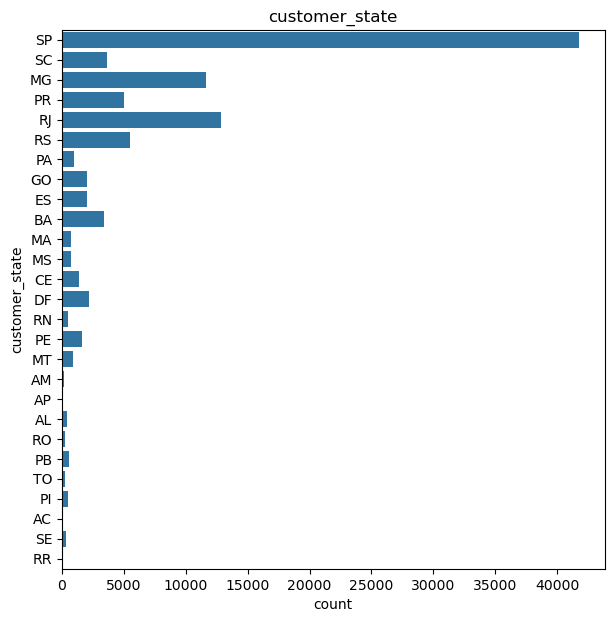

In [12]:
uni_ana_qual(customers_df, "customer_state")

In [13]:
test_chi_deux(customers_df, "customer_city", "customer_state")
test_chi_deux(customers_df, "customer_zip_code_prefix", "customer_state")

customer_city-customer_state: Chi-deux: 2529187.129188725, p-value: 0.0
customer_zip_code_prefix-customer_state: Chi-deux: 2585465.9999999995, p-value: 0.0


### geolocation_df

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [16]:
geolocation_df["geolocation_zip_code_prefix"].value_counts()

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
57140       1
57604       1
57750       1
57730       1
57000       1
Name: count, Length: 19015, dtype: int64

In [17]:
geolocation_df["geolocation_city"].value_counts()

geolocation_city
sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
                   ...  
sao bras               1
são brás               1
ibitiranga             1
quixabá                1
maceia³                1
Name: count, Length: 8011, dtype: int64

Unique values :
 ['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']


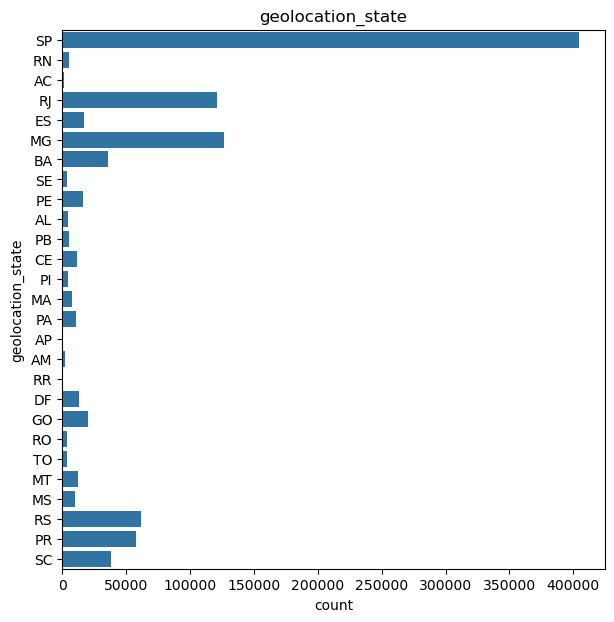

In [18]:
uni_ana_qual(geolocation_df, "geolocation_state")

### order_items_df

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
order_items_df["product_id"].value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
72ef2864978e354bc54f72073b13f17d      1
91aa6246d855a7321d3899fd76ec63cd      1
298532d06986d6132e5222b9362ad942      1
1cac2c9aee1db62c108da2205880e09c      1
4228bf901c8db392cbffcbc1f14a13e2      1
Name: count, Length: 32951, dtype: int64

In [22]:
order_items_df["seller_id"].value_counts()

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
00ab3eff1b5192e5f1a63bcecfee11c8       1
d7f1cfc638473be93baedbfd02208016       1
585175ec331ea177fa47199e39a6170a       1
c360e4787614ed31ac7a2f95d3b22dc6       1
efb628aa07c8ca93d7db0d85b91a4f5a       1
Name: count, Length: 3095, dtype: int64

Unique values :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


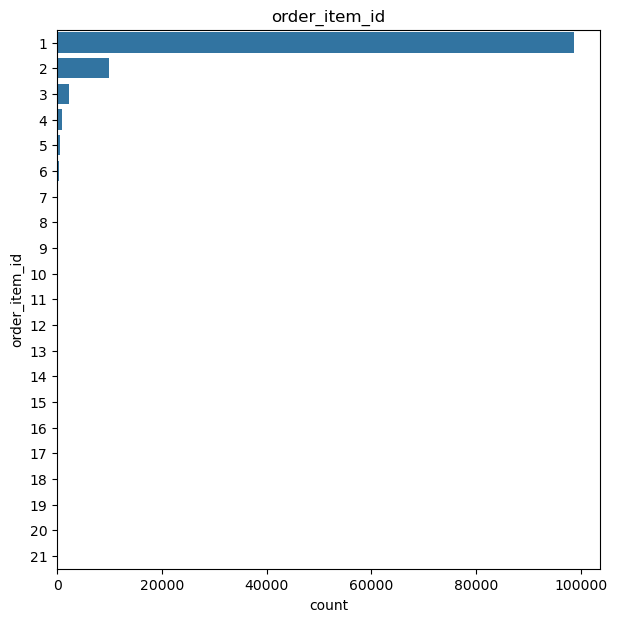

In [23]:
uni_ana_qual(order_items_df, "order_item_id")

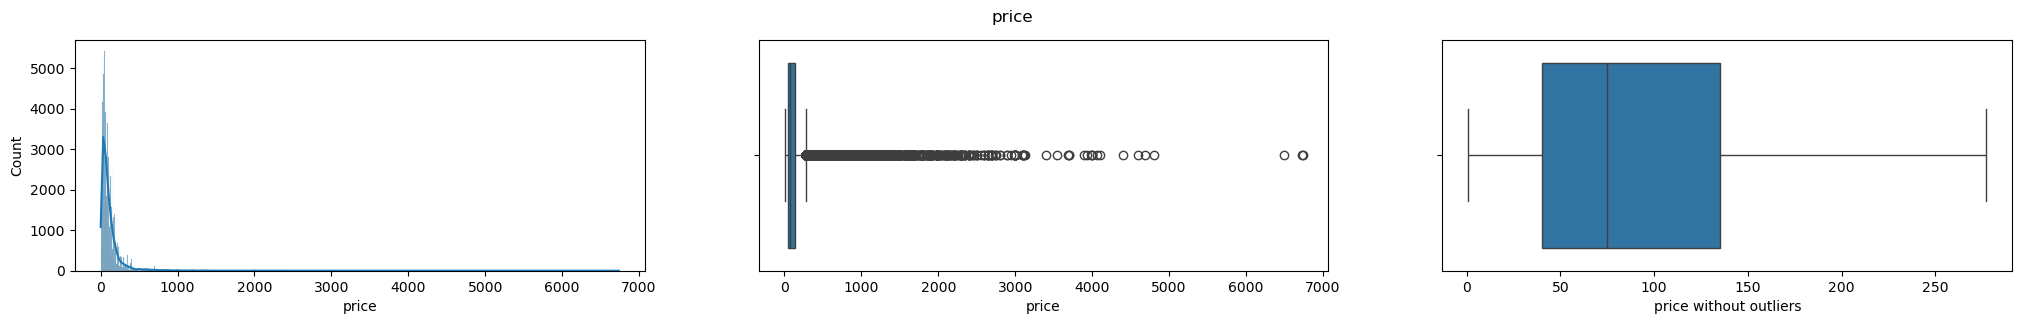

In [24]:
uni_ana_quant(order_items_df, "price")

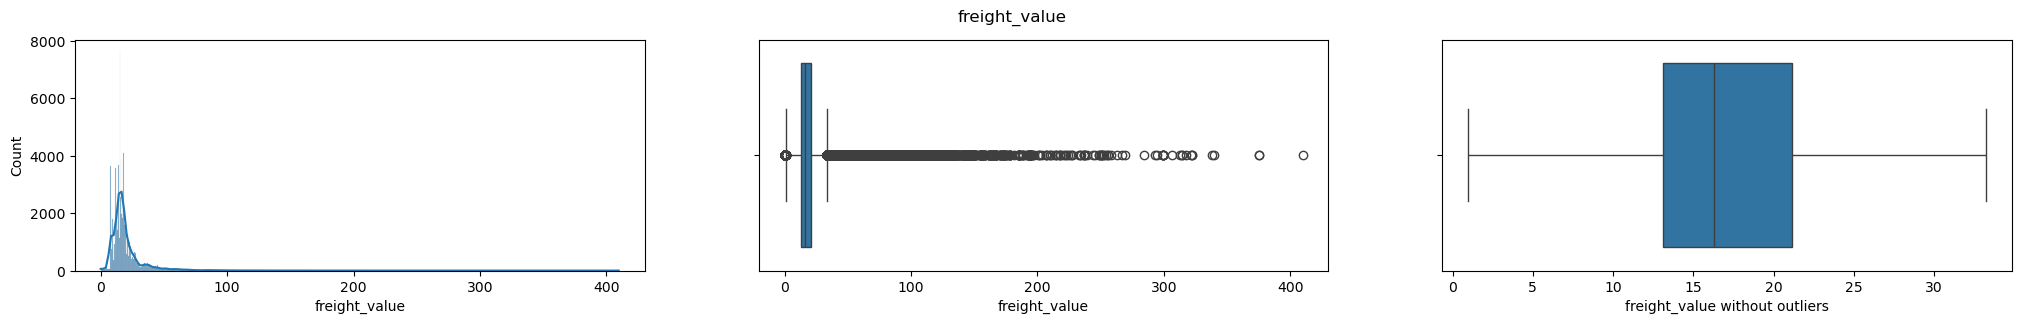

In [25]:
uni_ana_quant(order_items_df, "freight_value")

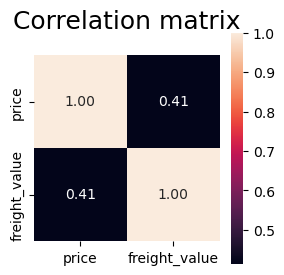

In [26]:
matrix_corellation(order_items_df, ["price", "freight_value"], 3)

### order_payments_df

In [27]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Unique values :
 ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


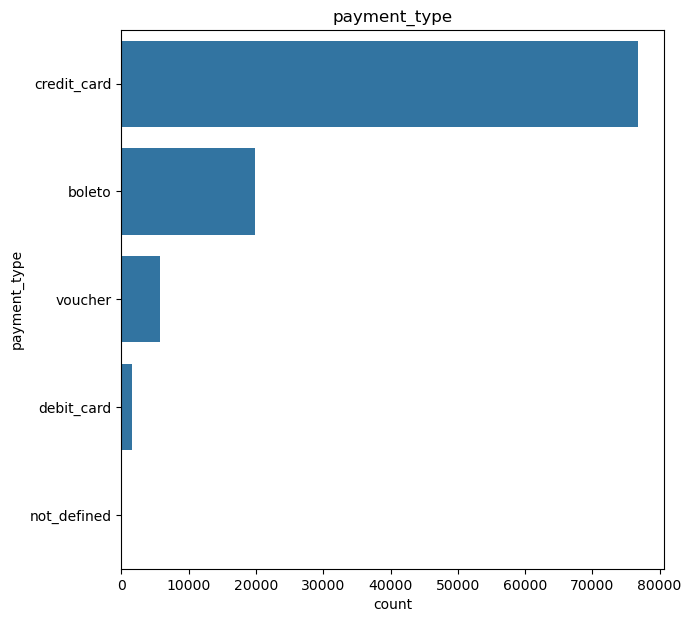

In [29]:
uni_ana_qual(order_payments_df, "payment_type")

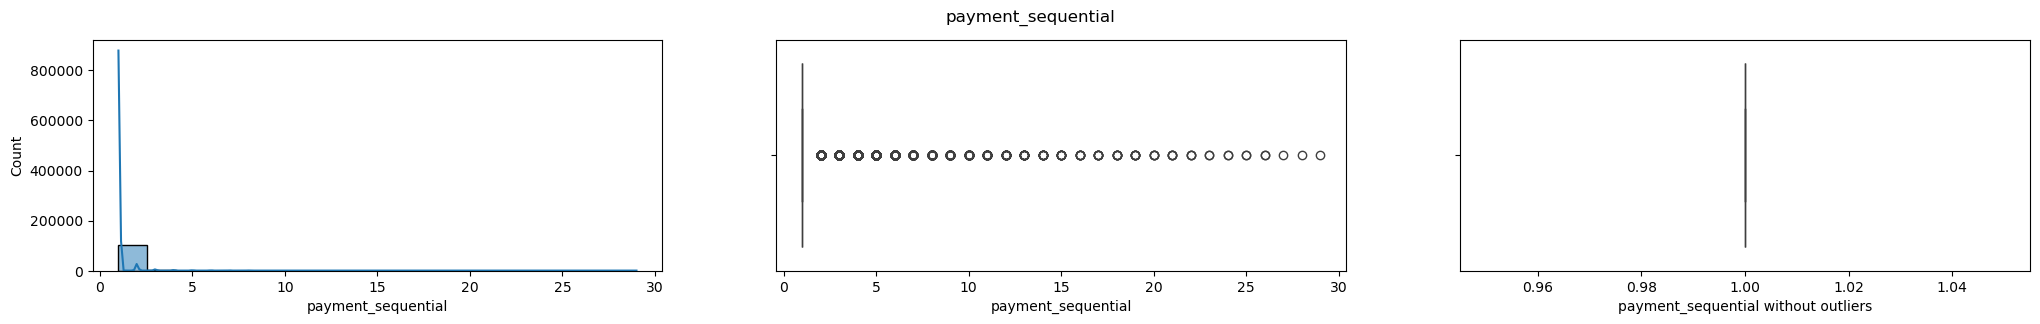

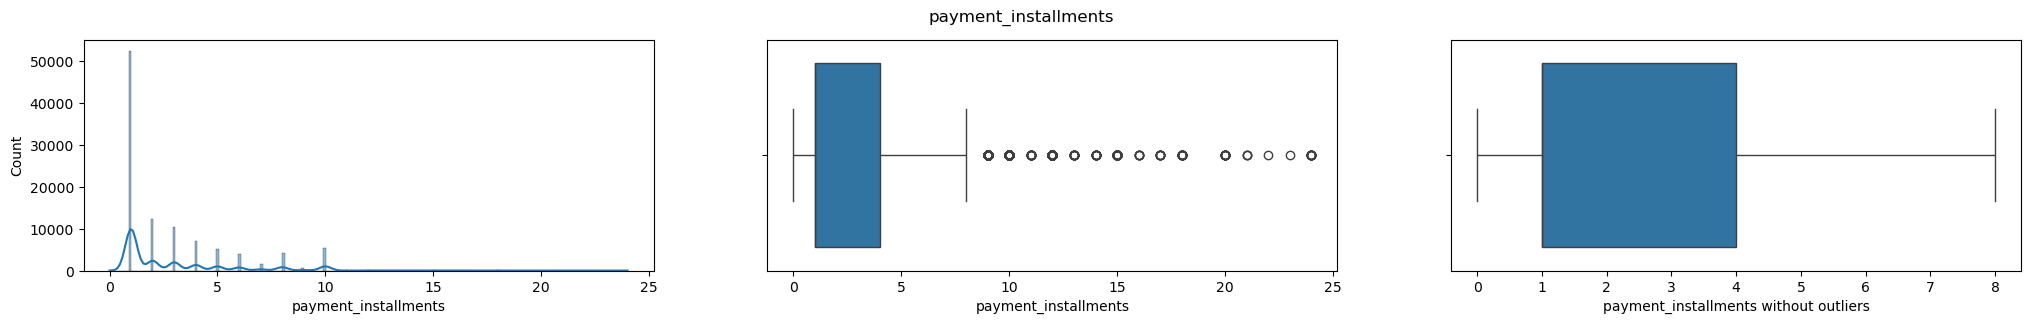

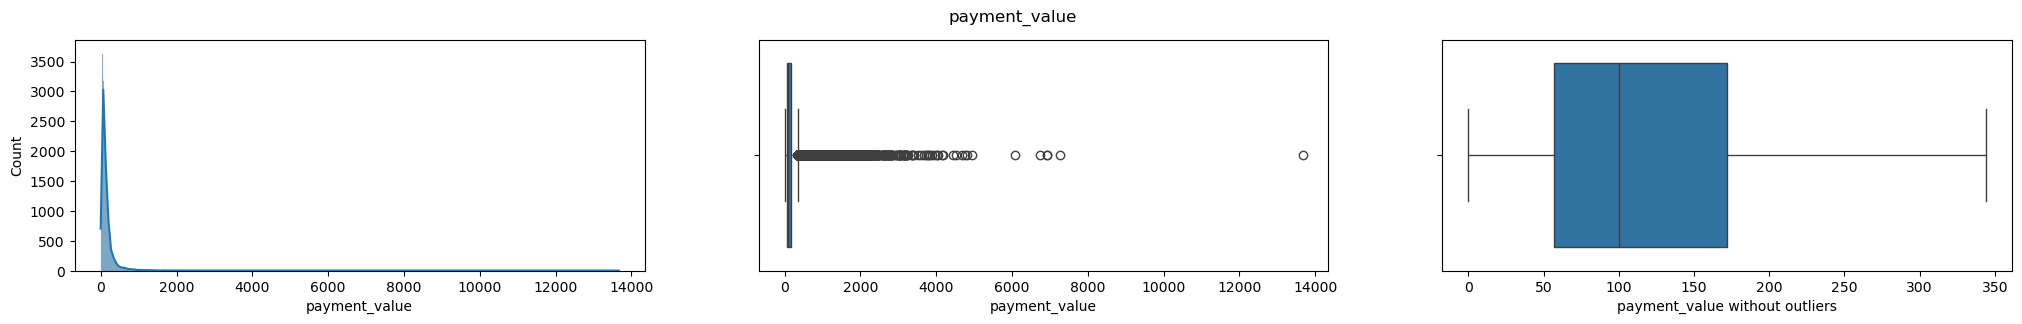

In [30]:
for variable in ["payment_sequential", "payment_installments", "payment_value"]:
    uni_ana_quant(order_payments_df, variable)

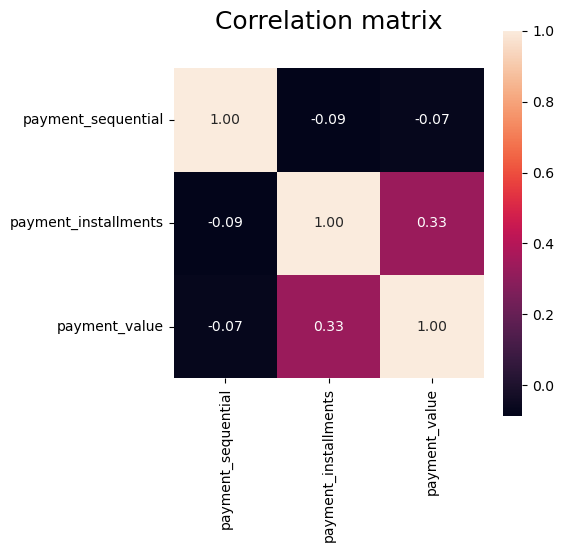

In [31]:
matrix_corellation(order_payments_df, ["payment_sequential", "payment_installments", "payment_value"], 5)

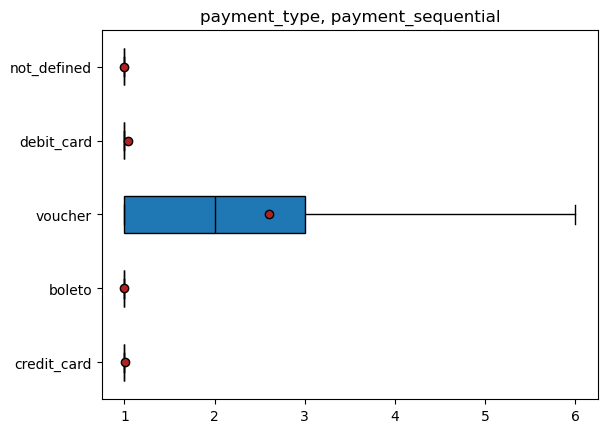

<Figure size 1300x1300 with 0 Axes>

p-value: 0.0 ; eta_squared: 0.1595969175899909


/tmp/ipykernel_8703/882115442.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_8703/882115442.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SSA = anova_table['sum_sq'][0]  # quadratic sum explained by the factor
/tmp/ipykernel_8703/882115442.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SST = SSA + anova_table['sum_sq'][1]  # total sum of squares


In [32]:
anova(order_payments_df, "payment_type", "payment_sequential")

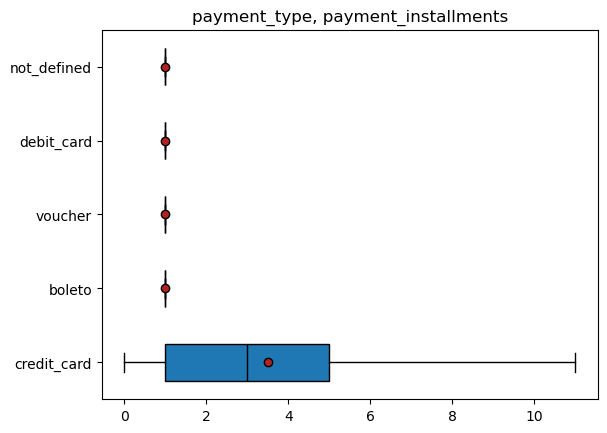

<Figure size 1300x1300 with 0 Axes>

p-value: 0.0 ; eta_squared: 0.1595969175899909


/tmp/ipykernel_8703/882115442.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_8703/882115442.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SSA = anova_table['sum_sq'][0]  # quadratic sum explained by the factor
/tmp/ipykernel_8703/882115442.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SST = SSA + anova_table['sum_sq'][1]  # total sum of squares


In [33]:
anova(order_payments_df, "payment_type", "payment_installments")

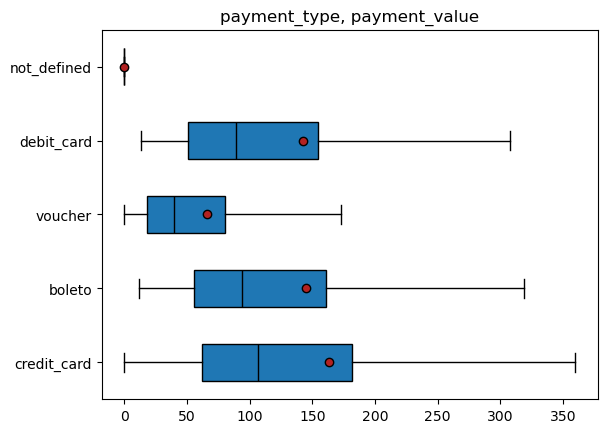

<Figure size 1300x1300 with 0 Axes>

p-value: 0.0 ; eta_squared: 0.1595969175899909


/tmp/ipykernel_8703/882115442.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_8703/882115442.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SSA = anova_table['sum_sq'][0]  # quadratic sum explained by the factor
/tmp/ipykernel_8703/882115442.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SST = SSA + anova_table['sum_sq'][1]  # total sum of squares


In [34]:
anova(order_payments_df, "payment_type", "payment_value")

### order_reviews_df

In [35]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Variables : mean_review_score

In [36]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


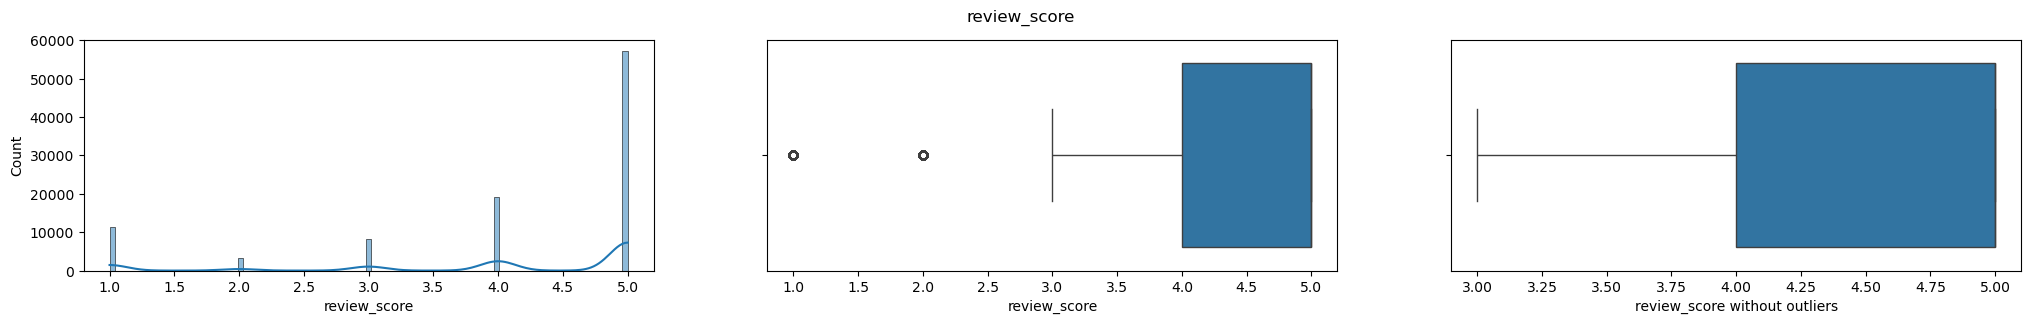

In [37]:
uni_ana_quant(order_reviews_df, "review_score")

### orders_df

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Variables : mean_time_delivery, mean_time_delay, nb_unavailable, nb_canceled, order_purchase_timestamp

In [39]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Unique values :
 ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


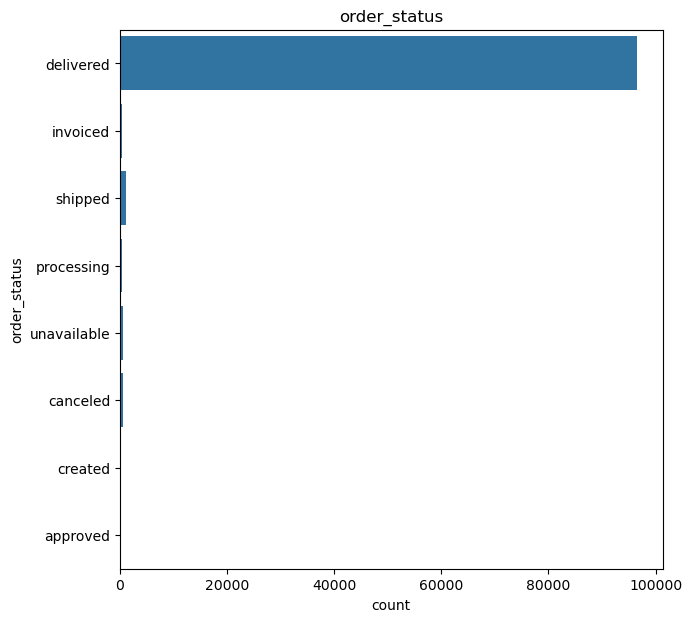

In [40]:
uni_ana_qual(orders_df, "order_status")

### products_df

In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [43]:
products_df["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [44]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

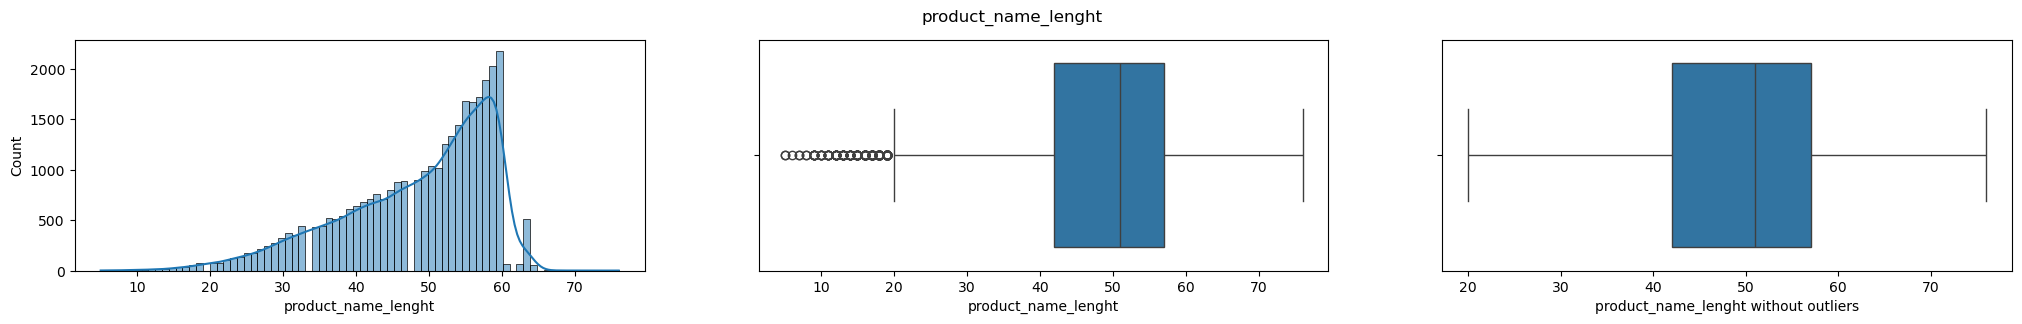

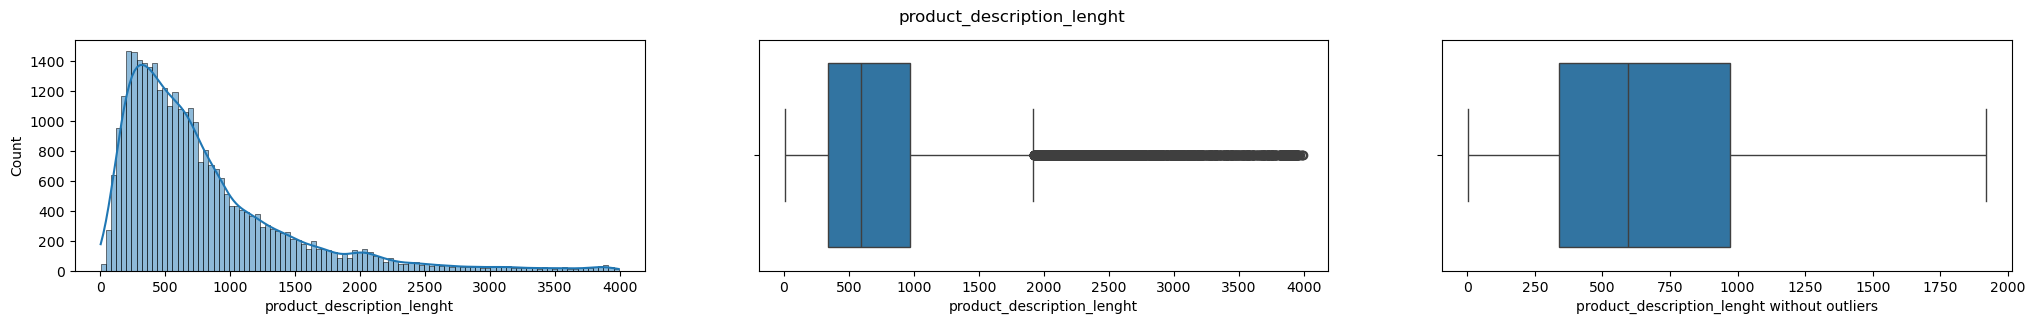

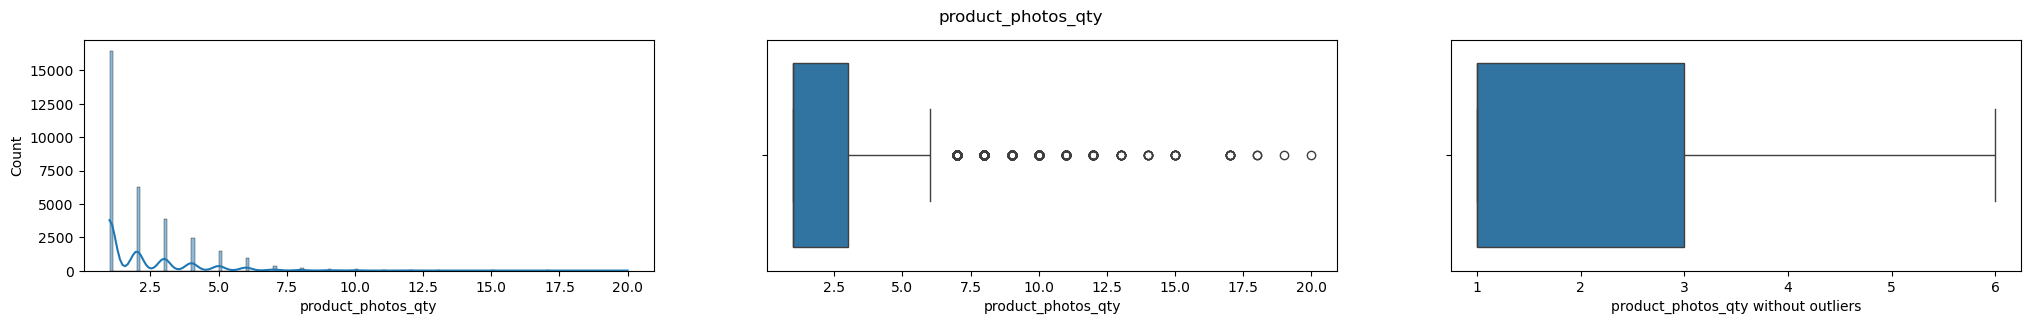

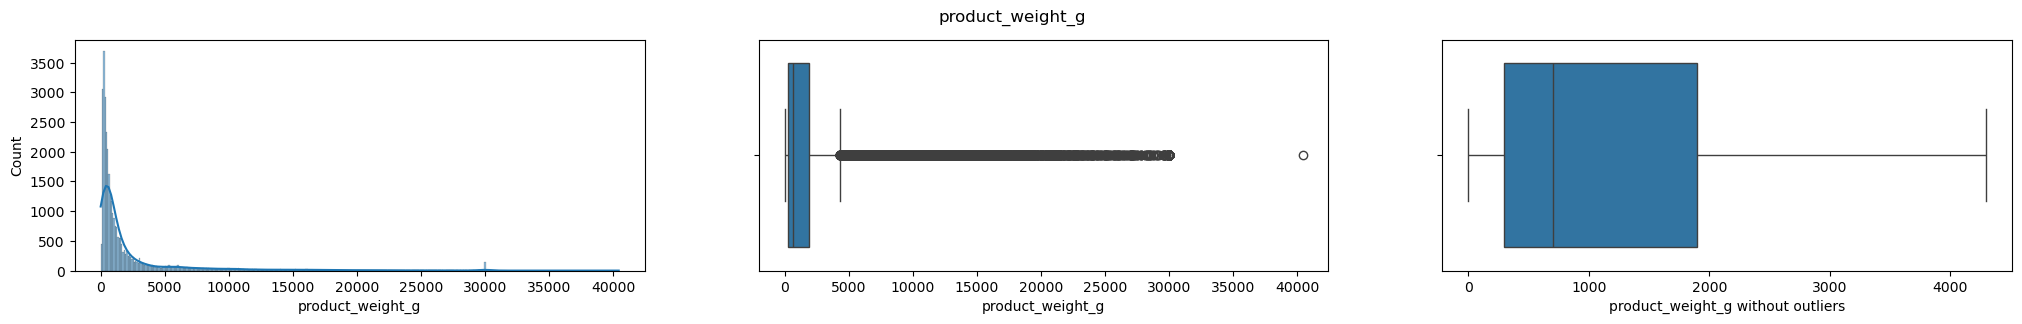

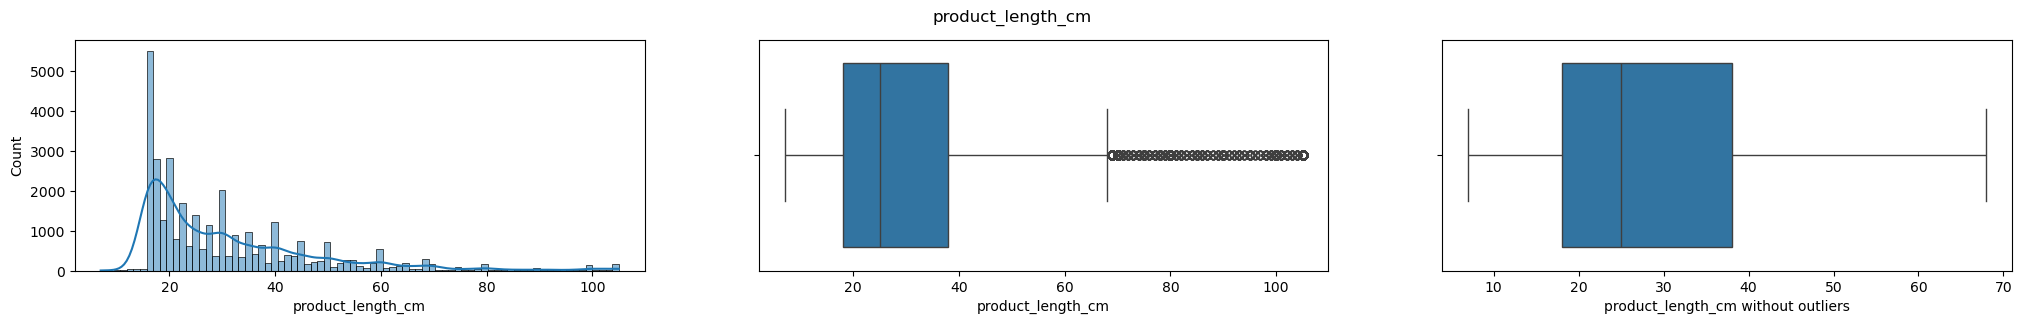

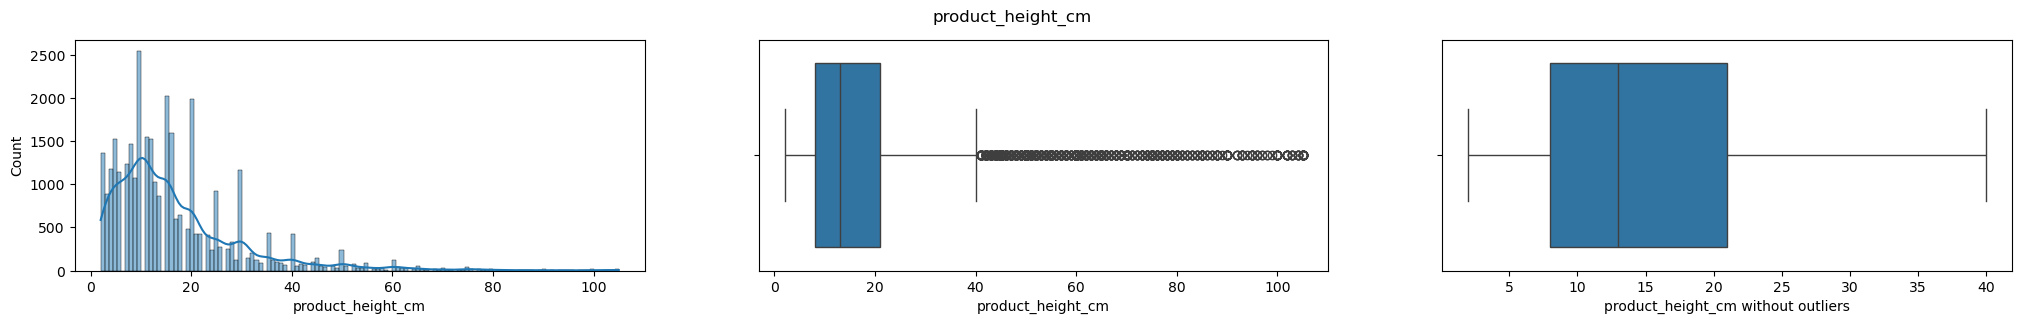

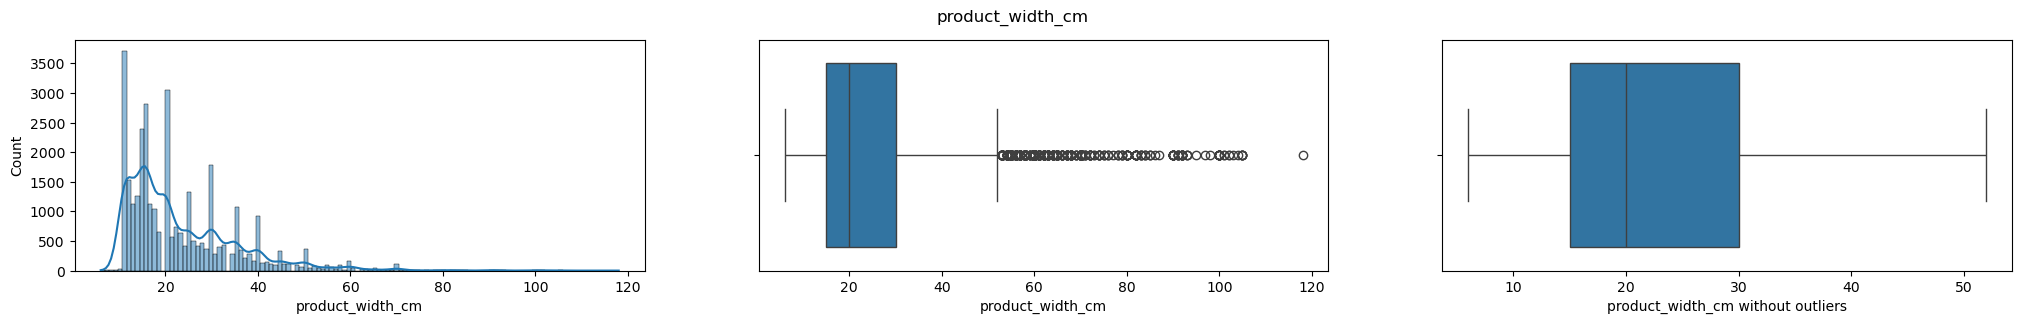

In [45]:
for variable in ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']:
    uni_ana_quant(products_df, variable)

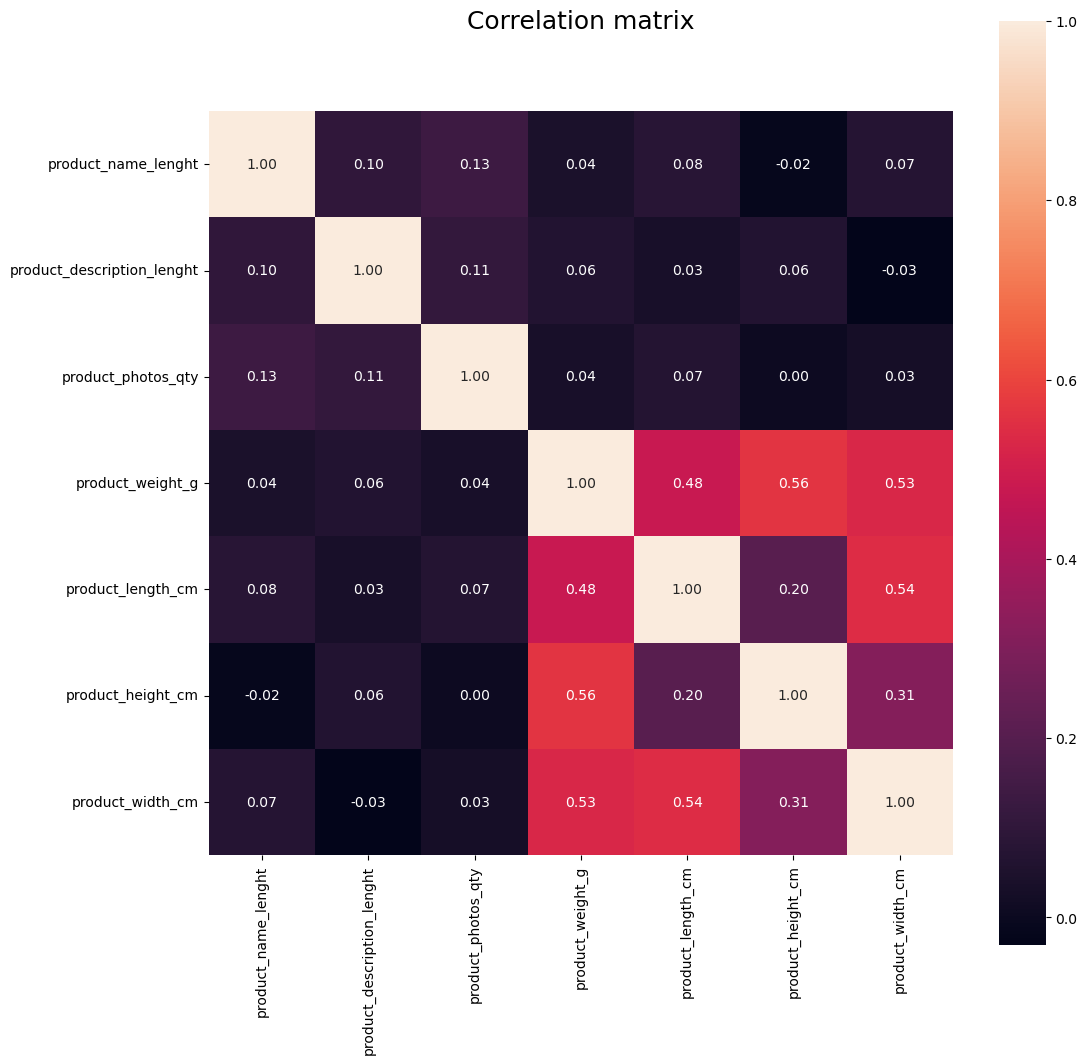

In [46]:
matrix_corellation(products_df, ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'])

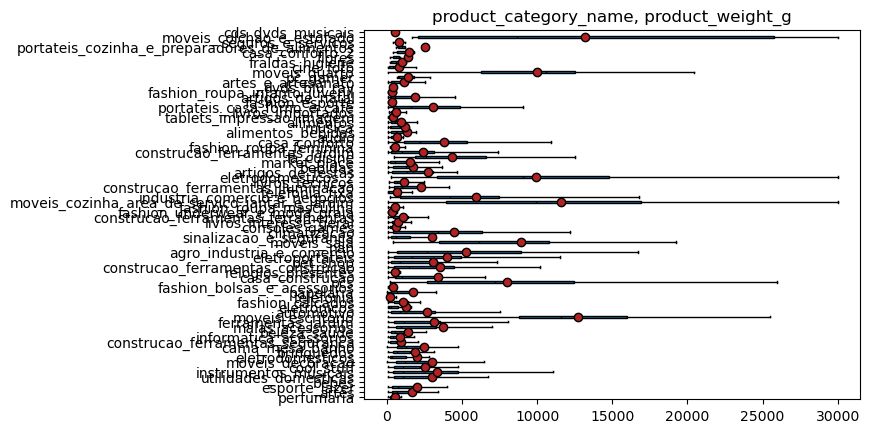

<Figure size 1300x1300 with 0 Axes>

p-value: 0.0 ; eta_squared: 0.1595969175899909


/tmp/ipykernel_8703/882115442.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_8703/882115442.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SSA = anova_table['sum_sq'][0]  # quadratic sum explained by the factor
/tmp/ipykernel_8703/882115442.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SST = SSA + anova_table['sum_sq'][1]  # total sum of squares


In [47]:
anova(products_df, "product_category_name", "product_weight_g")

### sellers_df

In [48]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [49]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [50]:
sellers_df["seller_zip_code_prefix"].value_counts()

seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
1026      8
         ..
95070     1
13501     1
12328     1
12226     1
4821      1
Name: count, Length: 2246, dtype: int64

In [51]:
sellers_df["seller_city"].value_counts()

seller_city
sao paulo            694
curitiba             127
rio de janeiro        96
belo horizonte        68
ribeirao preto        52
                    ... 
massaranduba           1
cornelio procopio      1
alvorada               1
ipaussu                1
congonhal              1
Name: count, Length: 611, dtype: int64

Unique values :
 ['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']


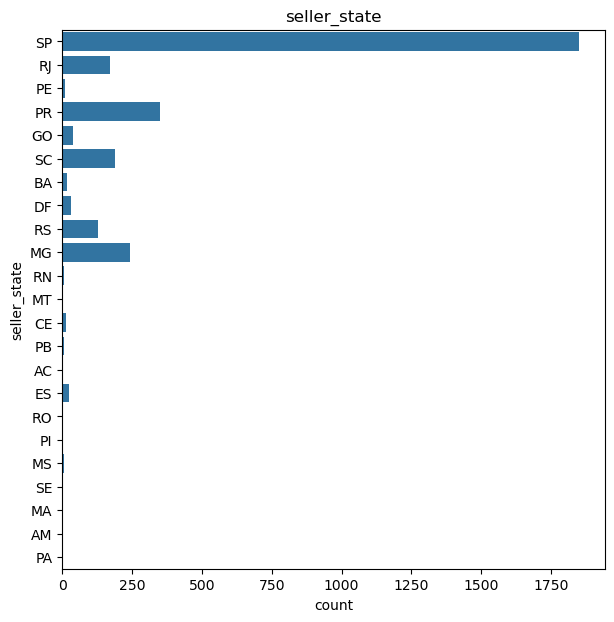

In [52]:
uni_ana_qual(sellers_df, "seller_state")

### translation_df

In [53]:
translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [54]:
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# New dataframe

In [55]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [56]:
final_customers_df = pd.DataFrame({
    "customer_id": customers_df["customer_unique_id"],
    "customer_state": customers_df["customer_state"],
})

In [57]:
df_merge_customers_orders = pd.merge(customers_df, orders_df, on=["customer_id"], how="inner")
dict_nb_orders = dict(df_merge_customers_orders.customer_unique_id.value_counts())
final_customers_df["nb_orders"] = final_customers_df["customer_id"].map(dict_nb_orders)

In [58]:
final_customers_df.nb_orders.value_counts()

nb_orders
1     93099
2      5490
3       609
4       120
5        40
6        36
7        21
17       17
9         9
Name: count, dtype: int64

In [59]:
order_items_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [60]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [61]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [62]:
df_merge_items_customers_orders = pd.merge(order_items_df, df_merge_customers_orders, on="order_id", how="inner")

In [63]:
df_merge_items_customers_orders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [64]:
df_merge_items_customers_orders.order_item_id.value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [65]:
df_nb_products = df_merge_items_customers_orders.groupby("customer_unique_id").product_id.count()
df_nb_items = df_merge_items_customers_orders.groupby("customer_unique_id").order_item_id.sum()
df_price = df_merge_items_customers_orders.groupby("customer_unique_id").price.mean()
df_freight_value = df_merge_items_customers_orders.groupby("customer_unique_id").freight_value.mean()

In [66]:
final_customers_df["mean_items_per_order"] = final_customers_df["customer_id"].map(dict(df_nb_items))/final_customers_df["nb_orders"]
final_customers_df["mean_price_per_product_ordered"] = final_customers_df["customer_id"].map(dict(df_price))
final_customers_df["mean_freight_value_per_product_ordered"] = final_customers_df["customer_id"].map(dict(df_freight_value))

In [67]:
final_customers_df.mean_items_per_order.value_counts()

mean_items_per_order
1.0      88090
3.0       7041
6.0       1186
2.0        750
10.0       456
         ...  
63.0         2
105.0        2
91.0         1
231.0        1
120.0        1
Name: count, Length: 68, dtype: int64

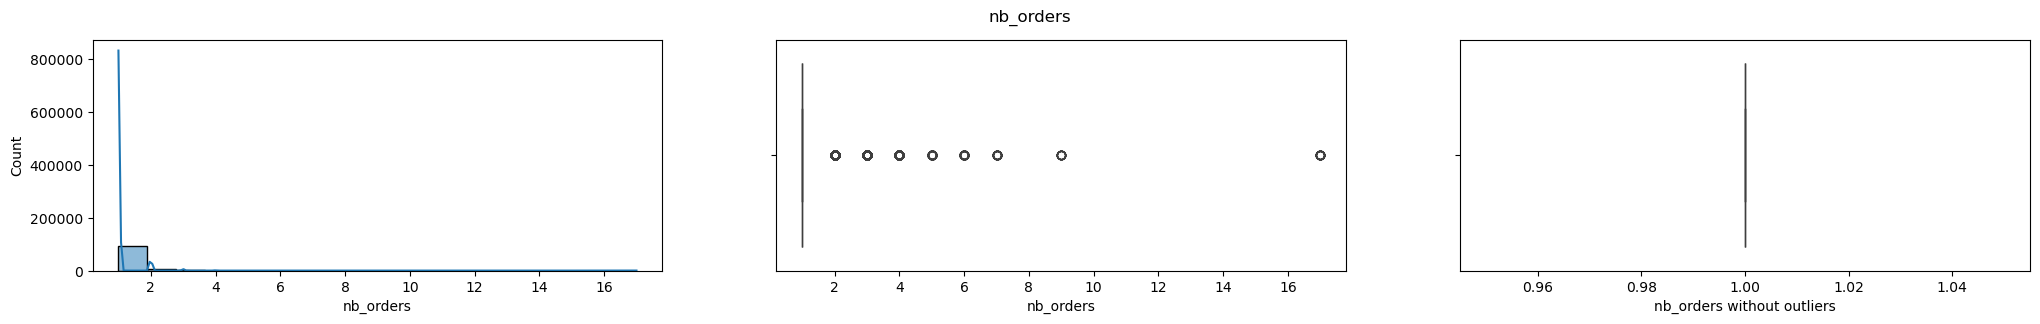

In [68]:
uni_ana_quant(final_customers_df, "nb_orders")

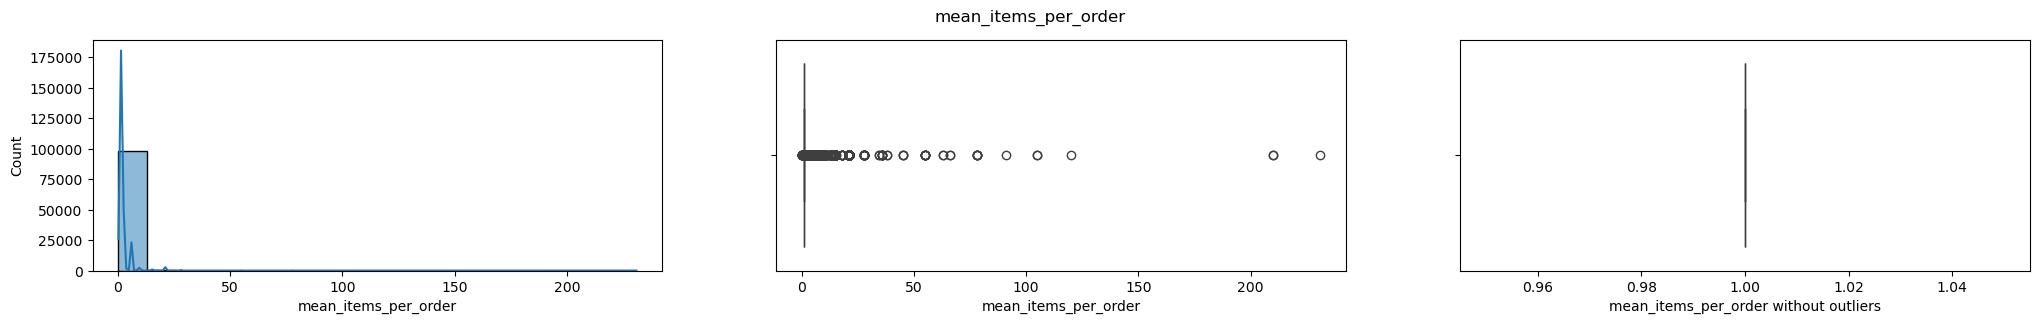

In [69]:
uni_ana_quant(final_customers_df, "mean_items_per_order")

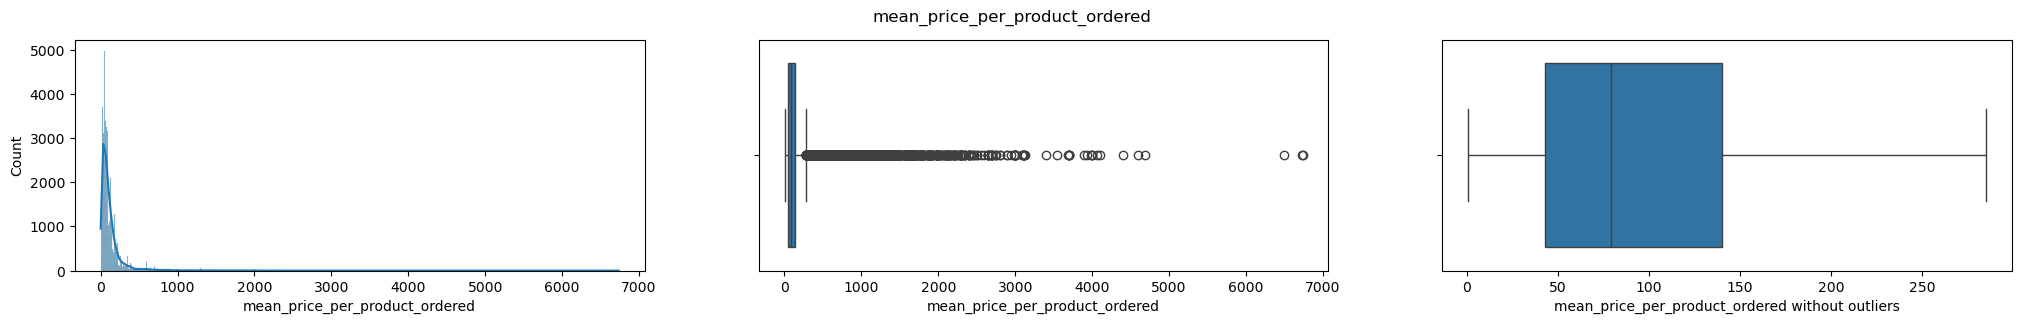

In [70]:
uni_ana_quant(final_customers_df, "mean_price_per_product_ordered")

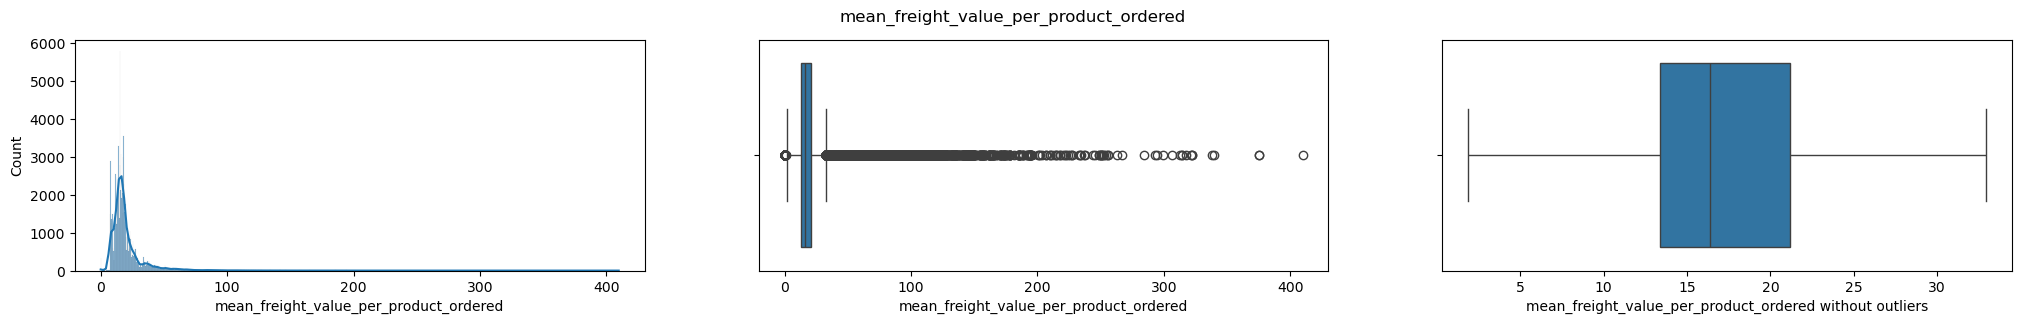

In [71]:
uni_ana_quant(final_customers_df, "mean_freight_value_per_product_ordered")

In [72]:
df_merge_payments_customers_orders = pd.merge(order_payments_df, df_merge_customers_orders, on="order_id", how="inner")

In [73]:
df_merge_payments_customers_orders

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,4291db0da71914754618cd789aebcd56,18570,conchas,SP,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,d3c7da954a324253814096bcaf240e4e,1519,sao paulo,SP,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,NaN,NaN,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00


In [74]:
df_payment_installments = df_merge_payments_customers_orders.groupby("customer_unique_id").payment_installments.mean()
df_payment_type = df_merge_payments_customers_orders.groupby("customer_unique_id").payment_type.agg(lambda x: x.mode()[0])

In [75]:
final_customers_df["most_frequent_payment_type"] = final_customers_df["customer_id"].map(dict(df_payment_type))
final_customers_df["mean_payment_installments"] = final_customers_df["customer_id"].map(dict(df_payment_installments))

In [76]:
final_customers_df

,customer_id,customer_state,nb_orders,mean_items_per_order,mean_price_per_product_ordered,mean_freight_value_per_product_ordered,most_frequent_payment_type,mean_payment_installments
0,861eff4711a542e4b93843c6dd7febb0,SP,1,1.0,124.99,21.88,credit_card,2.0
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,1.0,289.00,46.48,credit_card,8.0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,1.0,139.94,17.79,credit_card,7.0
3,259dac757896d24d7702b9acbbff3f3c,SP,1,1.0,149.94,23.36,credit_card,1.0
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,1.0,230.00,22.25,credit_card,8.0
...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,1.0,74.90,13.88,credit_card,6.0
99437,d52a67c98be1cf6a5c84435bd38d095d,SP,1,1.0,114.90,14.16,credit_card,3.0
99438,e9f50caf99f032f0bf3c55141f019d99,CE,1,1.0,37.00,19.04,credit_card,5.0
99439,73c2643a0a458b49f58cea58833b192e,RS,1,1.0,689.00,22.07,credit_card,2.0


Unique values :
 ['credit_card' 'debit_card' 'boleto' 'voucher' 'not_defined' nan]


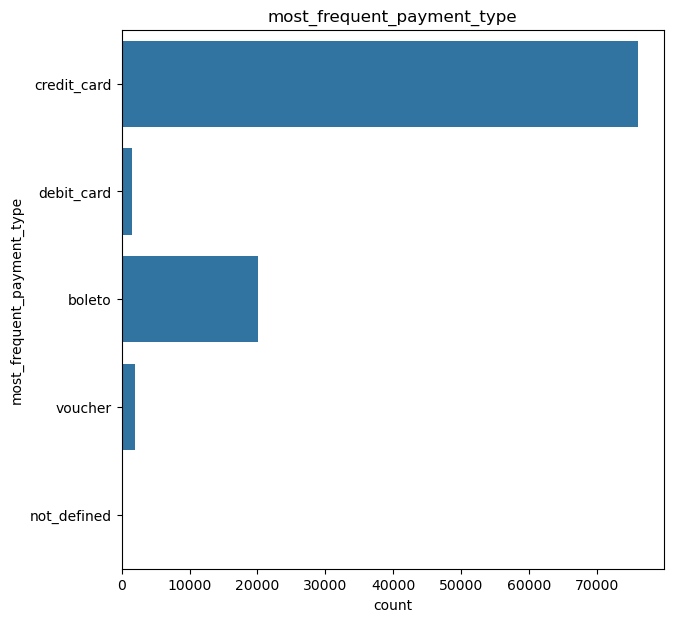

In [77]:
uni_ana_qual(final_customers_df, "most_frequent_payment_type")

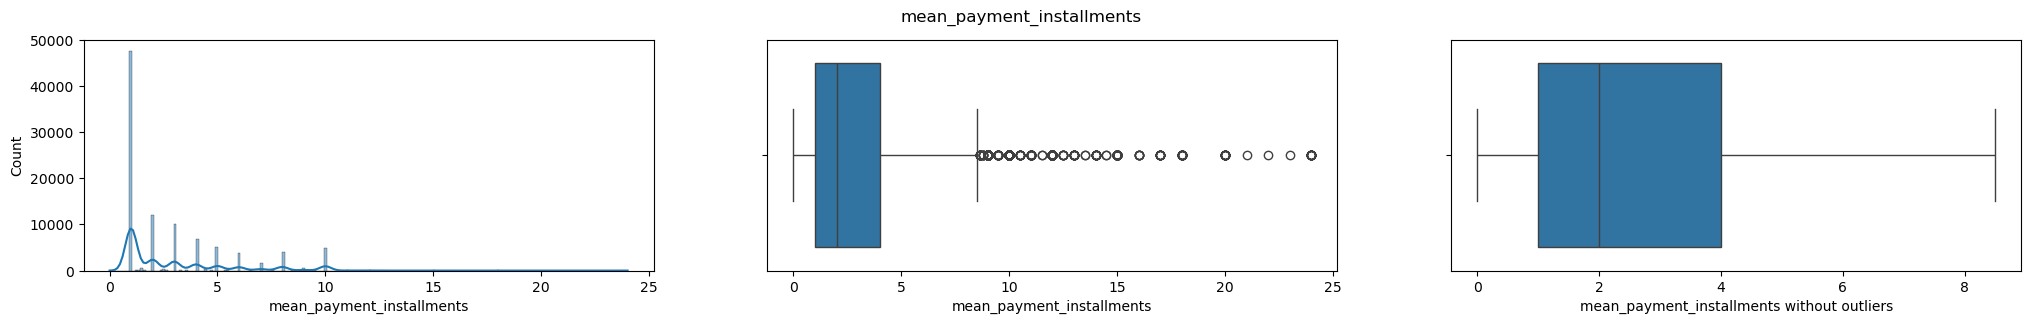

In [78]:
uni_ana_quant(final_customers_df, "mean_payment_installments")

In [79]:
df_merge_reviews_customers_orders = pd.merge(order_reviews_df, df_merge_customers_orders, on="order_id", how="inner")

In [80]:
df_reviews = df_merge_reviews_customers_orders.groupby("customer_unique_id").review_score.mean()
df_reviews

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    4.0
0000f46a3911fa3c0805444483337064    3.0
0000f6ccb0745a6a4b88665a16c9f078    4.0
0004aac84e0df4da2b147fca70cf8255    5.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    5.0
fffea47cd6d3cc0a88bd621562a9d061    4.0
ffff371b4d645b6ecea244b27531430a    5.0
ffff5962728ec6157033ef9805bacc48    5.0
ffffd2657e2aad2907e67c3e9daecbeb    5.0
Name: review_score, Length: 95380, dtype: float64

In [81]:
final_customers_df["mean_review_score"] = final_customers_df["customer_id"].map(dict(df_reviews))

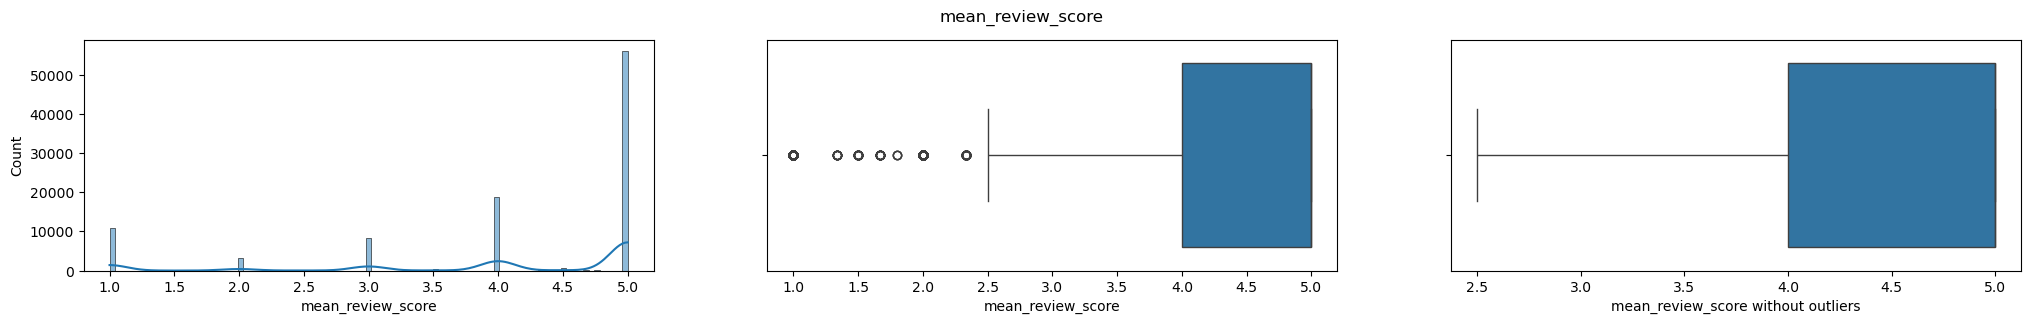

In [82]:
uni_ana_quant(final_customers_df, "mean_review_score")

In [83]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [84]:
df_merge_products_items_customers_orders = pd.merge(products_df, df_merge_items_customers_orders, on="product_id", how="inner")
df_merge_translation_products_items_customers_orders = pd.merge(translation_df, df_merge_products_items_customers_orders, on="product_category_name", how="inner")

In [85]:
df_product_category_name = df_merge_translation_products_items_customers_orders.groupby("customer_unique_id").product_category_name_english.agg(lambda x: x.mode()[0])
df_weight = df_merge_translation_products_items_customers_orders.groupby("customer_unique_id").product_weight_g.mean()

In [86]:
final_customers_df["most_frequent_product_category"] = final_customers_df["customer_id"].map(dict(df_product_category_name))
final_customers_df["mean_weight_per_product_ordered"] = final_customers_df["customer_id"].map(dict(df_weight))/1000

Unique values :
 ['office_furniture' 'housewares' 'home_confort' 'sports_leisure'
 'computers_accessories' nan 'furniture_decor' 'auto' 'air_conditioning'
 'health_beauty' 'garden_tools' 'pet_shop' 'bed_bath_table' 'telephony'
 'baby' 'watches_gifts' 'kitchen_dining_laundry_garden_furniture'
 'perfumery' 'toys' 'art' 'stationery' 'fashio_female_clothing'
 'consoles_games' 'construction_tools_lights' 'food_drink' 'drinks'
 'cool_stuff' 'fashion_bags_accessories' 'home_construction'
 'luggage_accessories' 'electronics' 'home_appliances_2'
 'fashion_male_clothing' 'small_appliances'
 'small_appliances_home_oven_and_coffee' 'books_general_interest'
 'home_appliances' 'costruction_tools_tools' 'signaling_and_security'
 'musical_instruments' 'construction_tools_construction' 'music'
 'books_imported' 'fashion_shoes' 'industry_commerce_and_business'
 'fashion_underwear_beach' 'dvds_blu_ray' 'construction_tools_safety'
 'food' 'fixed_telephony' 'furniture_living_room' 'tablets_printing_image'


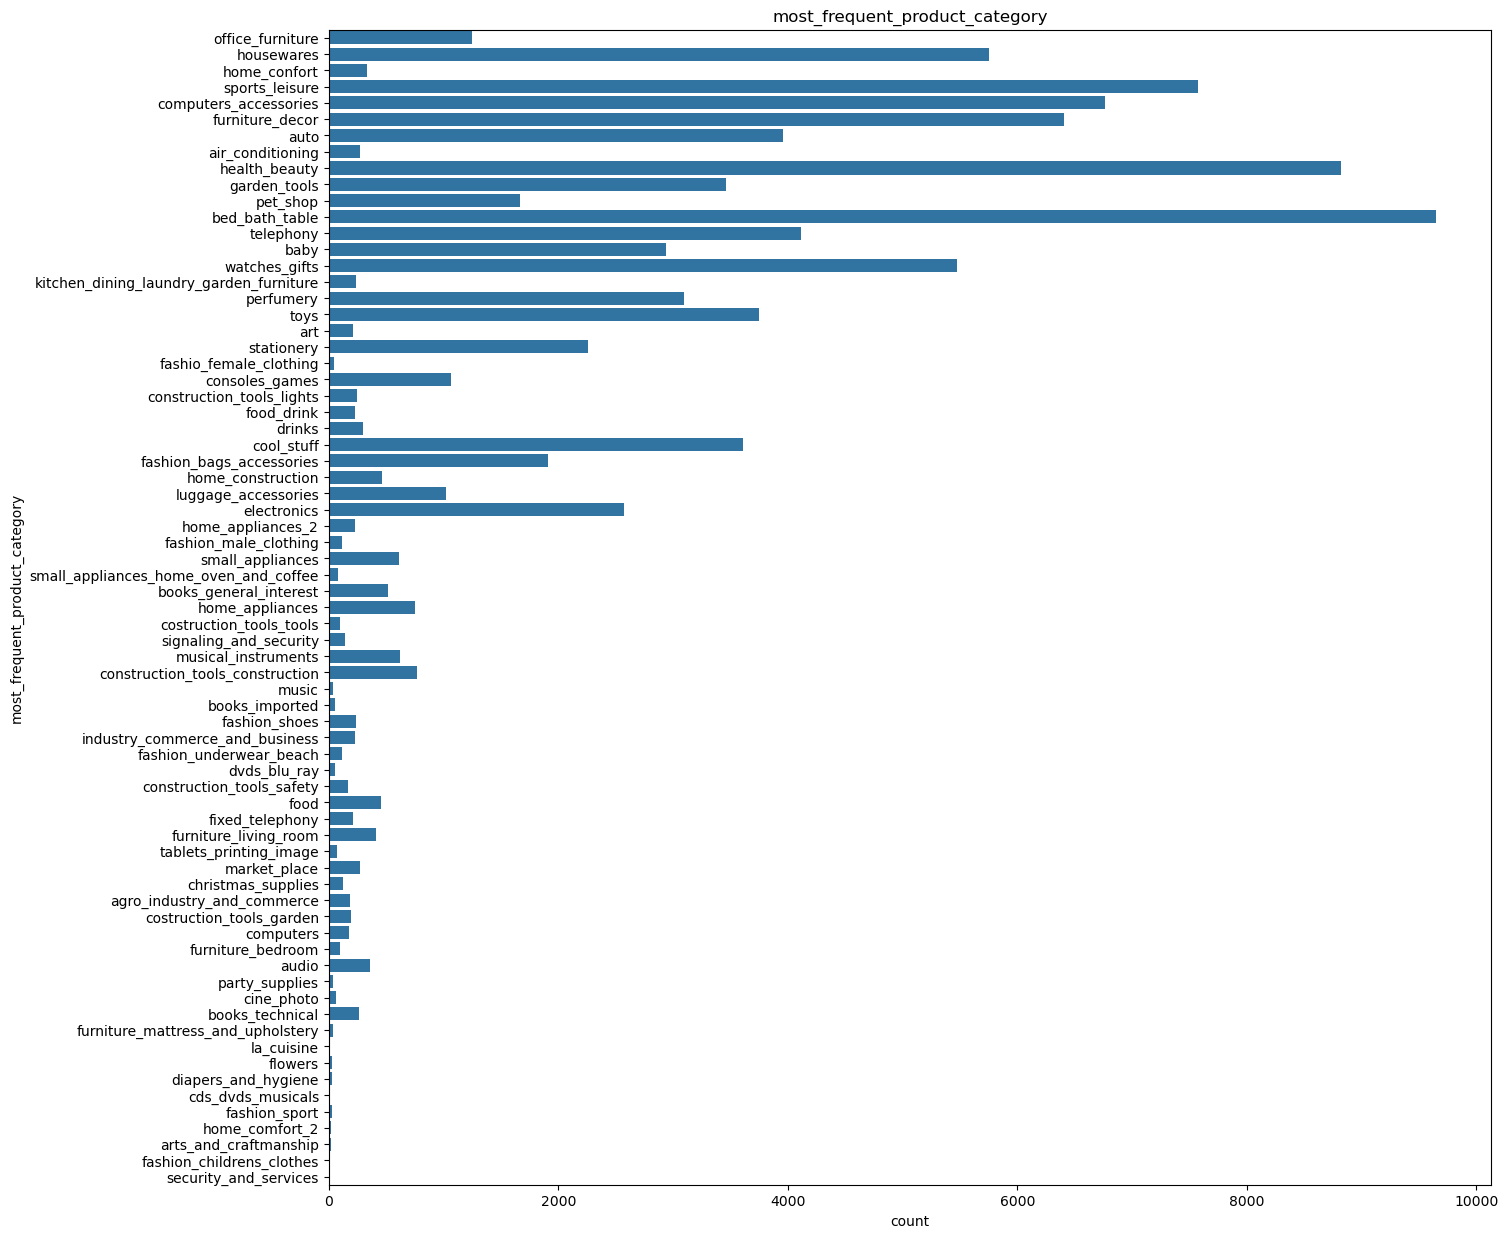

In [87]:
uni_ana_qual(final_customers_df, "most_frequent_product_category", size=15)

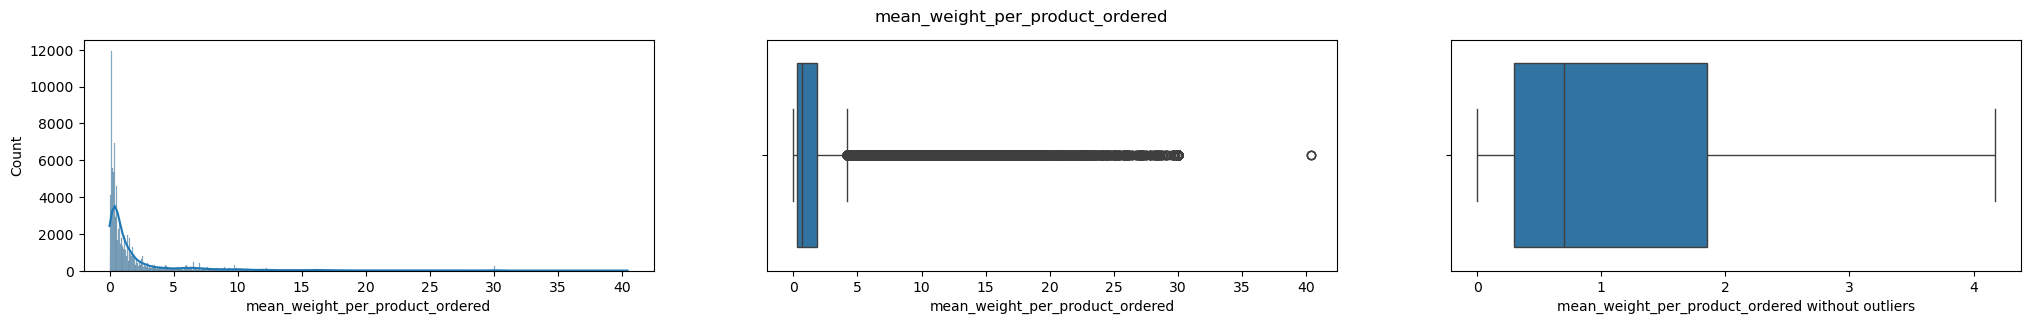

In [88]:
uni_ana_quant(final_customers_df, "mean_weight_per_product_ordered")

In [89]:
final_customers_df

,customer_id,customer_state,nb_orders,mean_items_per_order,mean_price_per_product_ordered,mean_freight_value_per_product_ordered,most_frequent_payment_type,mean_payment_installments,mean_review_score,most_frequent_product_category,mean_weight_per_product_ordered
0,861eff4711a542e4b93843c6dd7febb0,SP,1,1.0,124.99,21.88,credit_card,2.0,4.0,office_furniture,8.683
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,1.0,289.00,46.48,credit_card,8.0,5.0,housewares,10.150
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,1.0,139.94,17.79,credit_card,7.0,5.0,office_furniture,8.267
3,259dac757896d24d7702b9acbbff3f3c,SP,1,1.0,149.94,23.36,credit_card,1.0,5.0,office_furniture,12.160
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,1.0,230.00,22.25,credit_card,8.0,5.0,home_confort,5.200
...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,1.0,74.90,13.88,credit_card,6.0,4.0,books_general_interest,0.611
99437,d52a67c98be1cf6a5c84435bd38d095d,SP,1,1.0,114.90,14.16,credit_card,3.0,5.0,sports_leisure,1.211
99438,e9f50caf99f032f0bf3c55141f019d99,CE,1,1.0,37.00,19.04,credit_card,5.0,1.0,health_beauty,0.870
99439,73c2643a0a458b49f58cea58833b192e,RS,1,1.0,689.00,22.07,credit_card,2.0,5.0,watches_gifts,0.710


In [90]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [91]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [92]:
df_unavailable = df_merge_customers_orders.groupby('customer_unique_id').apply(lambda x: (x['order_status'] == 'unavailable').sum())
df_canceled = df_merge_customers_orders.groupby('customer_unique_id').apply(lambda x: (x['order_status'] == 'canceled').sum())

/tmp/ipykernel_8703/2617139932.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unavailable = df_merge_customers_orders.groupby('customer_unique_id').apply(lambda x: (x['order_status'] == 'unavailable').sum())
/tmp/ipykernel_8703/2617139932.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_canceled = df_merge_customers_orders.groupby('customer_unique_id').apply(lambda x: (x['order_status'] == 'ca

In [93]:
final_customers_df["nb_unavailable"] = final_customers_df["customer_id"].map(dict(df_unavailable))
final_customers_df["nb_canceled"] = final_customers_df["customer_id"].map(dict(df_canceled))

In [94]:
final_customers_df

,customer_id,customer_state,nb_orders,mean_items_per_order,mean_price_per_product_ordered,mean_freight_value_per_product_ordered,most_frequent_payment_type,mean_payment_installments,mean_review_score,most_frequent_product_category,mean_weight_per_product_ordered,nb_unavailable,nb_canceled
0,861eff4711a542e4b93843c6dd7febb0,SP,1,1.0,124.99,21.88,credit_card,2.0,4.0,office_furniture,8.683,0,0
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,1.0,289.00,46.48,credit_card,8.0,5.0,housewares,10.150,0,0
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,1.0,139.94,17.79,credit_card,7.0,5.0,office_furniture,8.267,0,0
3,259dac757896d24d7702b9acbbff3f3c,SP,1,1.0,149.94,23.36,credit_card,1.0,5.0,office_furniture,12.160,0,0
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,1.0,230.00,22.25,credit_card,8.0,5.0,home_confort,5.200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,1.0,74.90,13.88,credit_card,6.0,4.0,books_general_interest,0.611,0,0
99437,d52a67c98be1cf6a5c84435bd38d095d,SP,1,1.0,114.90,14.16,credit_card,3.0,5.0,sports_leisure,1.211,0,0
99438,e9f50caf99f032f0bf3c55141f019d99,CE,1,1.0,37.00,19.04,credit_card,5.0,1.0,health_beauty,0.870,0,0
99439,73c2643a0a458b49f58cea58833b192e,RS,1,1.0,689.00,22.07,credit_card,2.0,5.0,watches_gifts,0.710,0,0


In [95]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [96]:
df_merge_customers_orders.delivery_date = pd.to_datetime(df_merge_customers_orders.order_delivered_customer_date)
df_merge_customers_orders.estimated_delivery_date = pd.to_datetime(df_merge_customers_orders.order_estimated_delivery_date)
df_merge_customers_orders.purchase_date = pd.to_datetime(df_merge_customers_orders.order_purchase_timestamp)


df_merge_customers_orders["delay"] = (df_merge_customers_orders.delivery_date - df_merge_customers_orders.estimated_delivery_date).dt.days
df_merge_customers_orders["delivery_time"] = (df_merge_customers_orders.delivery_date - df_merge_customers_orders.purchase_date).dt.days

/tmp/ipykernel_8703/1641816901.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_merge_customers_orders.delivery_date = pd.to_datetime(df_merge_customers_orders.order_delivered_customer_date)
/tmp/ipykernel_8703/1641816901.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_merge_customers_orders.estimated_delivery_date = pd.to_datetime(df_merge_customers_orders.order_estimated_delivery_date)
/tmp/ipykernel_8703/1641816901.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_merge_customers_orders.purchase_date = pd.to_datetime(df_merge_customers_orders.order_purchase_timestamp)


In [97]:
df_delay = df_merge_customers_orders.groupby("customer_unique_id")["delay"].mean()
df_delivery_time = df_merge_customers_orders.groupby("customer_unique_id")["delivery_time"].mean()

final_customers_df["mean_delay"] = final_customers_df["customer_id"].map(dict(df_delay))
final_customers_df["mean_delivery_time"] = final_customers_df["customer_id"].map(dict(df_delivery_time))

In [98]:
last_purchase_date = pd.to_datetime(df_merge_customers_orders.sort_values(by="order_purchase_timestamp" ,ascending=False).iloc[0].order_purchase_timestamp)
df_merge_customers_orders["recency"] = (last_purchase_date - df_merge_customers_orders.purchase_date).dt.days

df_recency = df_merge_customers_orders.groupby("customer_unique_id")["recency"].min()

final_customers_df["recency"] = final_customers_df["customer_id"].map(dict(df_recency))

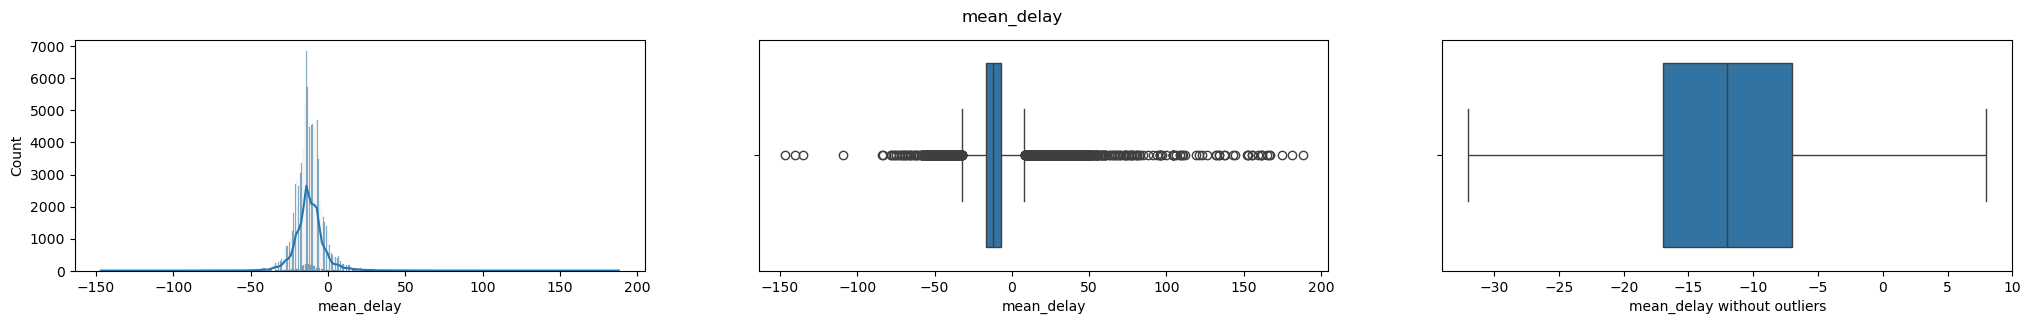

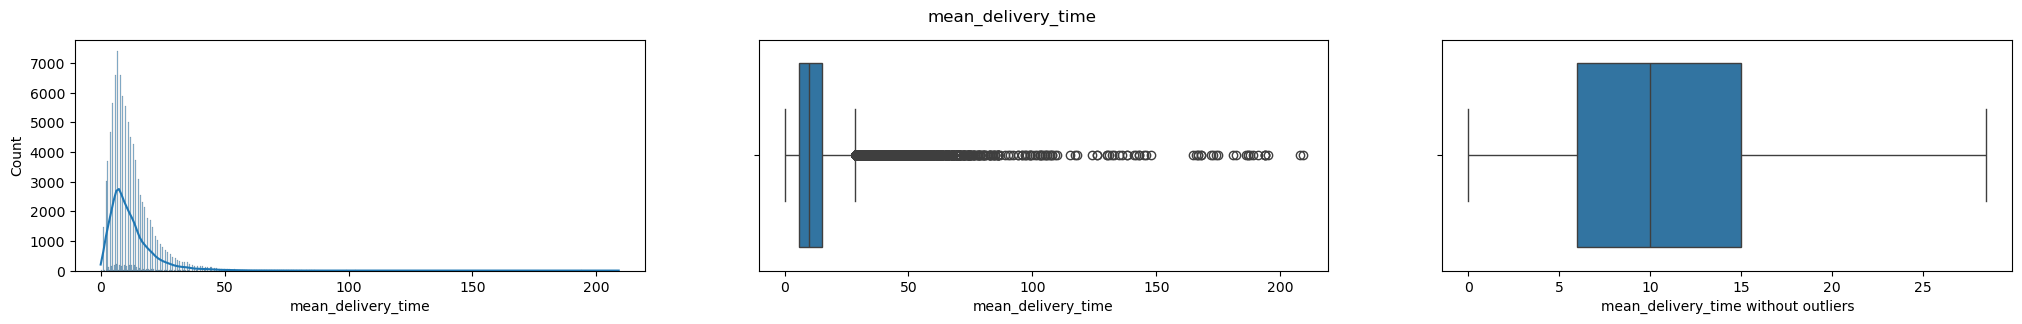

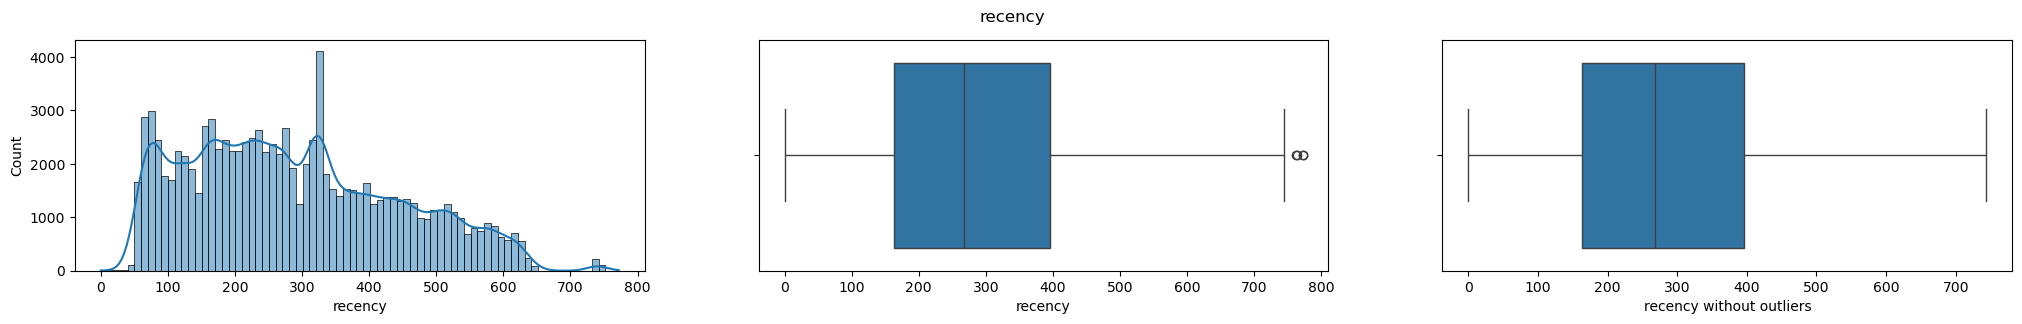

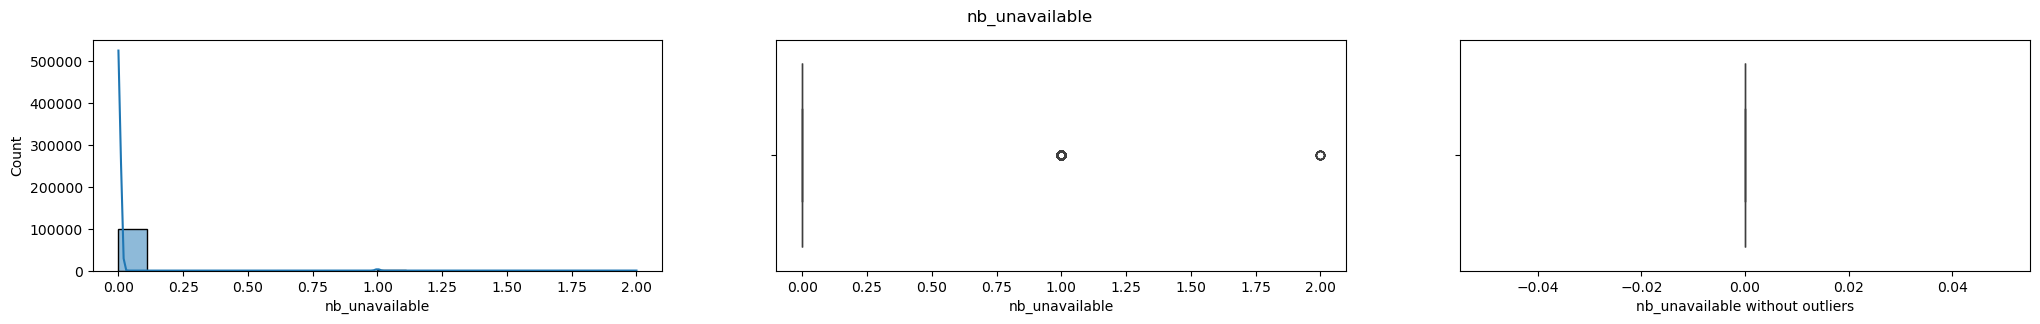

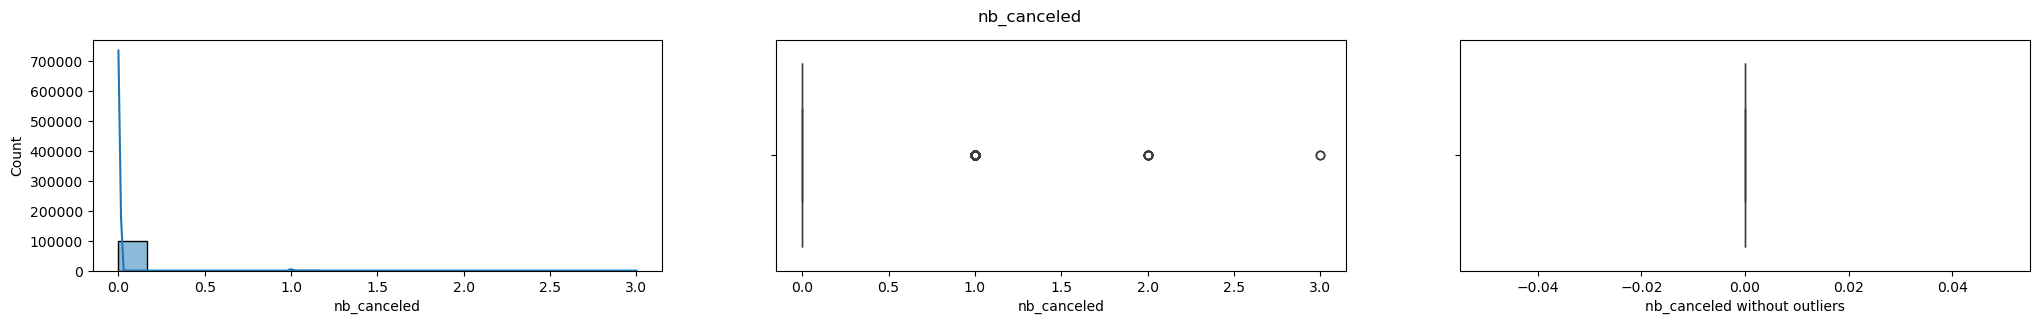

In [99]:
for var in ["mean_delay", "mean_delivery_time", "recency", "nb_unavailable", "nb_canceled"]:
    uni_ana_quant(final_customers_df, var)

In [100]:
final_customers_df

,customer_id,customer_state,nb_orders,mean_items_per_order,mean_price_per_product_ordered,mean_freight_value_per_product_ordered,most_frequent_payment_type,mean_payment_installments,mean_review_score,most_frequent_product_category,mean_weight_per_product_ordered,nb_unavailable,nb_canceled,mean_delay,mean_delivery_time,recency
0,861eff4711a542e4b93843c6dd7febb0,SP,1,1.0,124.99,21.88,credit_card,2.0,4.0,office_furniture,8.683,0,0,-11.0,8.0,519
1,290c77bc529b7ac935b93aa66c333dc3,SP,1,1.0,289.00,46.48,credit_card,8.0,5.0,housewares,10.150,0,0,-8.0,16.0,277
2,060e732b5b29e8181a18229c7b0b2b5e,SP,1,1.0,139.94,17.79,credit_card,7.0,5.0,office_furniture,8.267,0,0,1.0,26.0,151
3,259dac757896d24d7702b9acbbff3f3c,SP,1,1.0,149.94,23.36,credit_card,1.0,5.0,office_furniture,12.160,0,0,-13.0,14.0,218
4,345ecd01c38d18a9036ed96c73b8d066,SP,1,1.0,230.00,22.25,credit_card,8.0,5.0,home_confort,5.200,0,0,-6.0,11.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,SP,1,1.0,74.90,13.88,credit_card,6.0,4.0,books_general_interest,0.611,0,0,-12.0,6.0,193
99437,d52a67c98be1cf6a5c84435bd38d095d,SP,1,1.0,114.90,14.16,credit_card,3.0,5.0,sports_leisure,1.211,0,0,-9.0,7.0,196
99438,e9f50caf99f032f0bf3c55141f019d99,CE,1,1.0,37.00,19.04,credit_card,5.0,1.0,health_beauty,0.870,0,0,7.0,30.0,191
99439,73c2643a0a458b49f58cea58833b192e,RS,1,1.0,689.00,22.07,credit_card,2.0,5.0,watches_gifts,0.710,0,0,-19.0,12.0,347


In [101]:
final_customers_df.columns

Index(['customer_id', 'customer_state', 'nb_orders', 'mean_items_per_order',
       'mean_price_per_product_ordered',
       'mean_freight_value_per_product_ordered', 'most_frequent_payment_type',
       'mean_payment_installments', 'mean_review_score',
       'most_frequent_product_category', 'mean_weight_per_product_ordered',
       'nb_unavailable', 'nb_canceled', 'mean_delay', 'mean_delivery_time',
       'recency'],
      dtype='object')

In [102]:
def missing_values(df):
    nb_na = df.isnull().sum()
    return nb_na[nb_na>0]

In [103]:
missing_values(final_customers_df)

mean_items_per_order                       685
mean_price_per_product_ordered             685
mean_freight_value_per_product_ordered     685
most_frequent_payment_type                   1
mean_payment_installments                    1
mean_review_score                          725
most_frequent_product_category            2022
mean_weight_per_product_ordered           2023
mean_delay                                2760
mean_delivery_time                        2760
dtype: int64

In [104]:
final_customers_df.dropna(inplace=True)

In [105]:
missing_values(final_customers_df)

Series([], dtype: int64)

## ACP

In [106]:
quant_variables = [
    'nb_orders', 'mean_items_per_order',
       'mean_price_per_product_ordered',
       'mean_freight_value_per_product_ordered',
       'mean_payment_installments', 'mean_review_score',
       'mean_weight_per_product_ordered',
       'nb_unavailable', 'nb_canceled', 'mean_delay', 'mean_delivery_time',
       'recency'
]

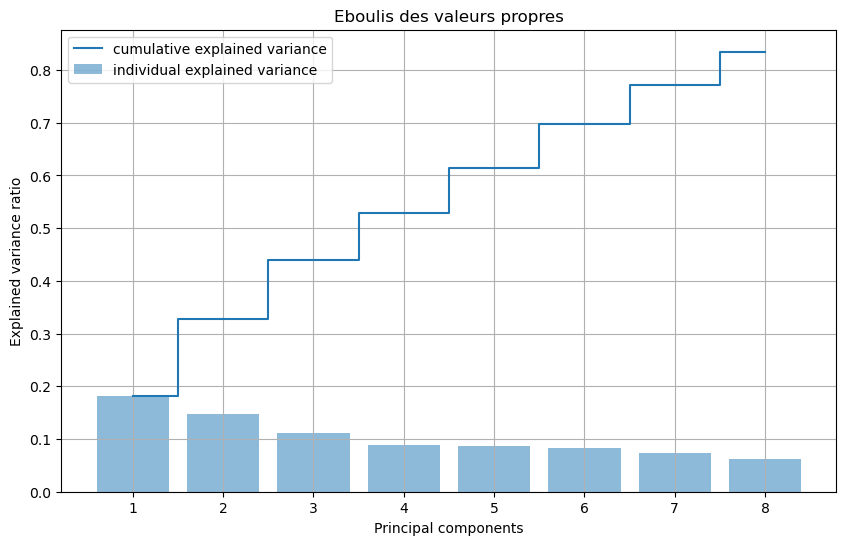

Component 1: 18.07% of explained variance
Component 2: 14.73% of explained variance
Component 3: 11.21% of explained variance
Component 4: 8.86% of explained variance
Component 5: 8.59% of explained variance
Component 6: 8.32% of explained variance
Component 7: 7.43% of explained variance
Component 8: 6.26% of explained variance


In [107]:
from sklearn import preprocessing
from sklearn import decomposition

X = final_customers_df[quant_variables].values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(0.8)
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Eboulis des valeurs propres')
plt.legend(loc='best')
plt.grid()
plt.show()

for i, ev in enumerate(explained_variance, 1):
    print(f'Component {i}: {ev*100:.2f}% of explained variance')

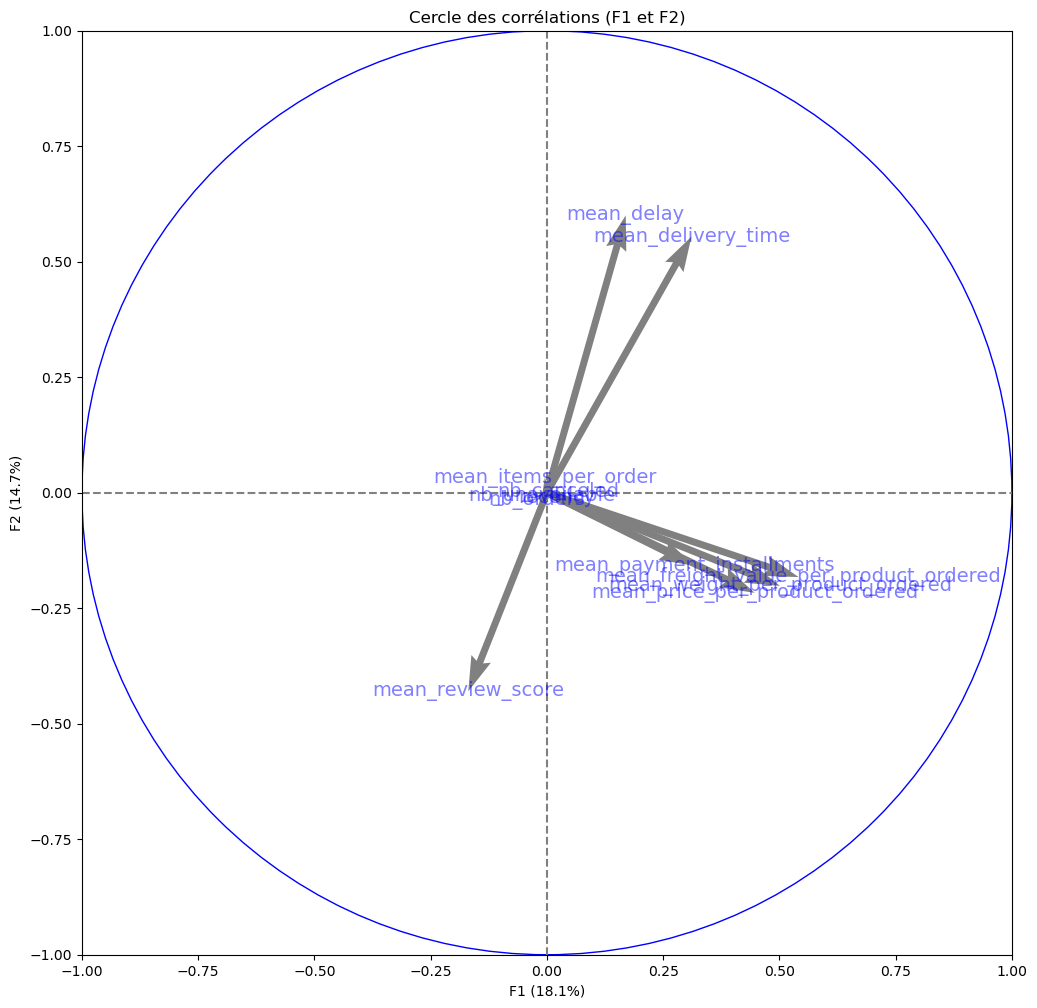

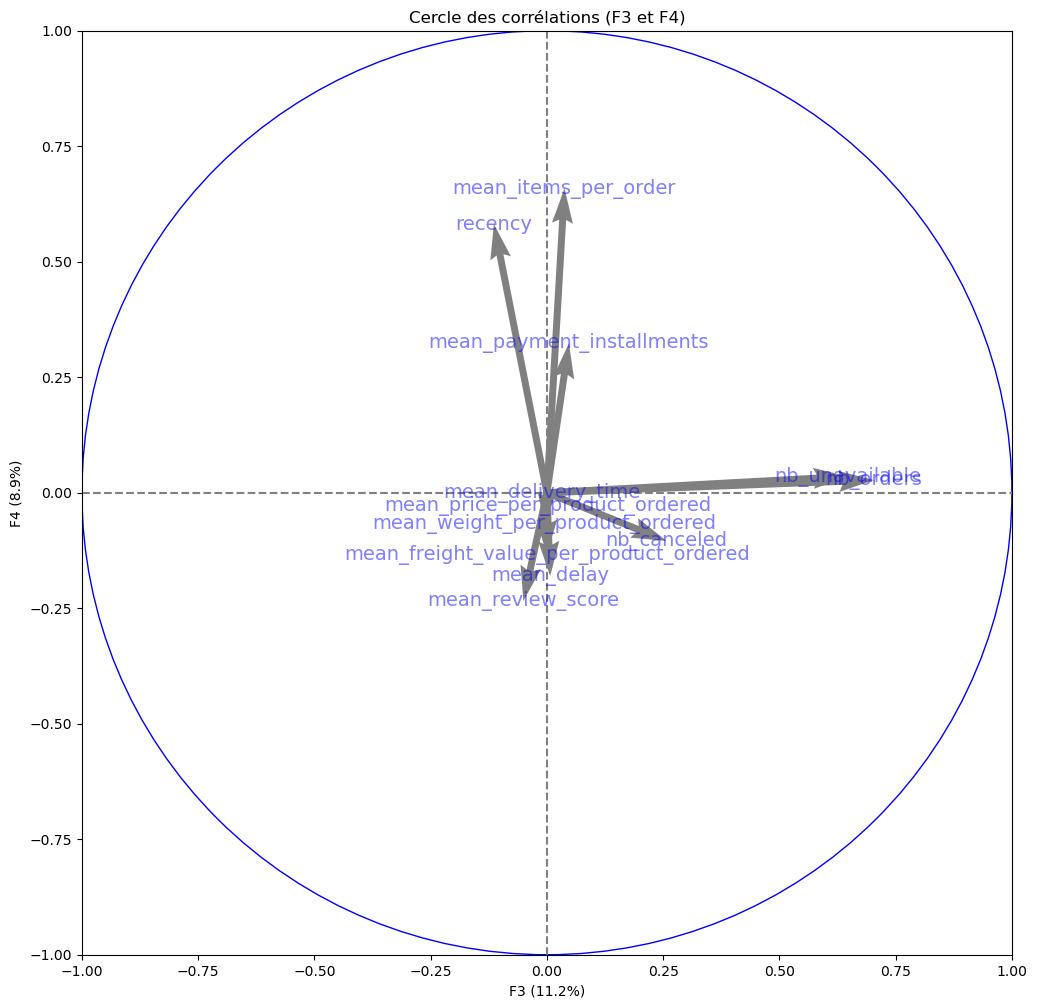

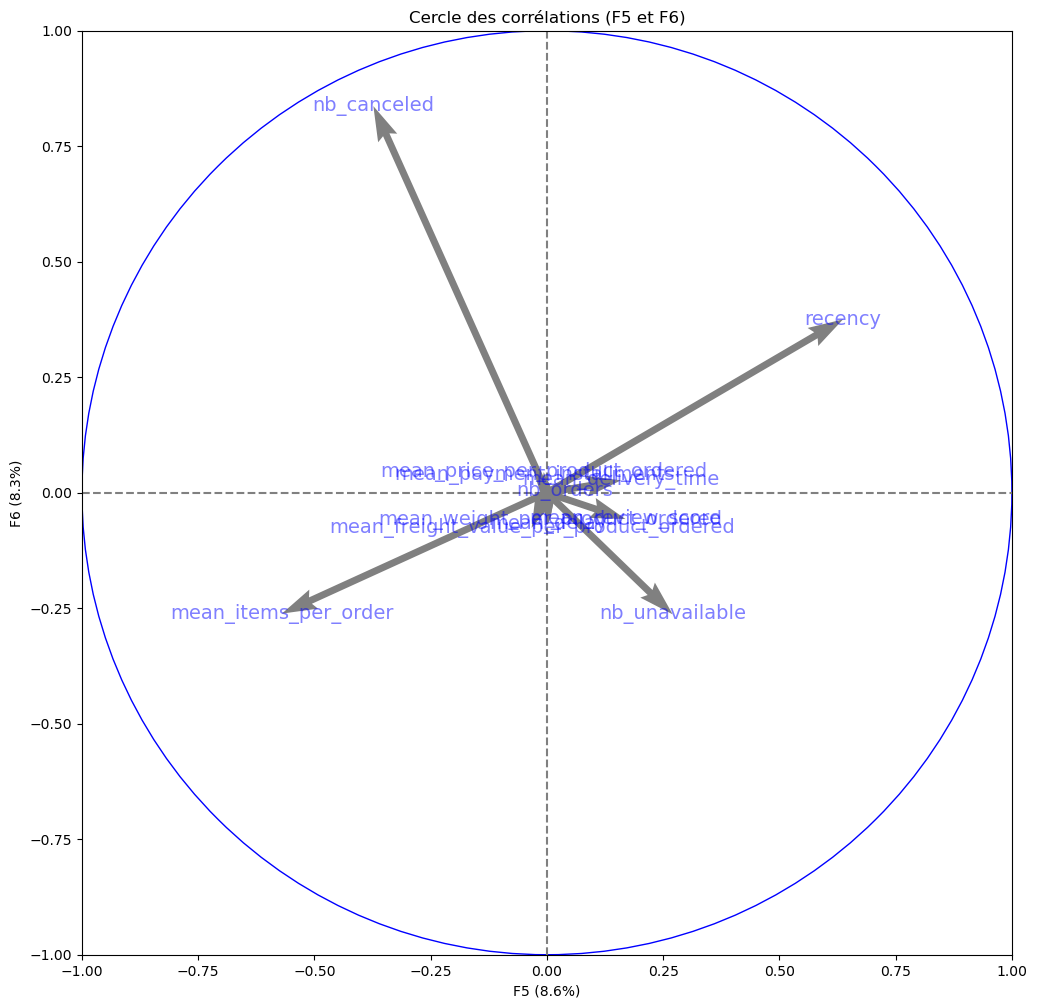

In [108]:
# Cercle des corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les plans factoriels spécifiés, ici [(0,1), (2,3), (4,5)]
        if d2 < n_comp:

            # Initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # Détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Affichage des flèches
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

# Composantes principales
pcs = pca.components_
n_comp = pcs.shape[0]

# Définir les paires de composantes à visualiser, en s'assurant qu'elles sont dans les limites
axis_ranks = [(0,1), (2,3), (4,5)]
axis_ranks = [(d1, d2) for d1, d2 in axis_ranks if d2 < n_comp]

# Afficher les cercles des corrélations
display_circles(pcs, n_comp, pca, axis_ranks, labels=np.array(quant_variables))

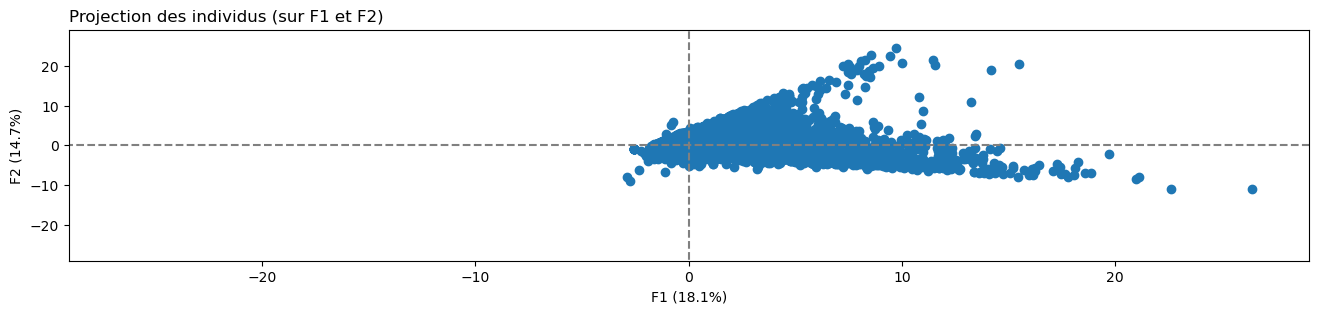

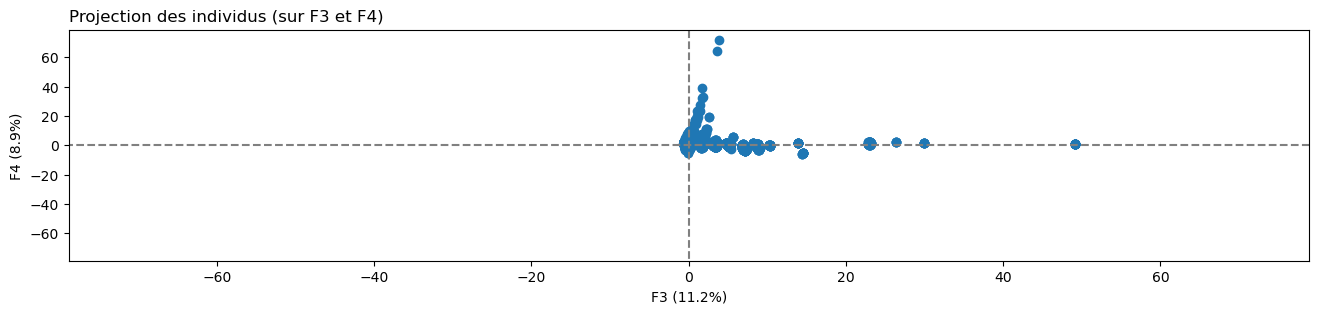

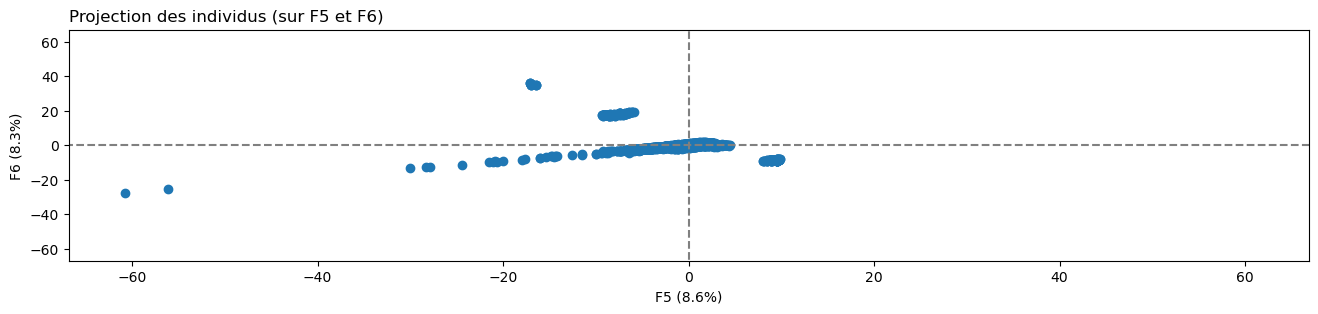

In [109]:
# Projection des individus
X_projected = pca.transform(X_scaled)
for d1, d2 in [(0,1),(2,3),(4,5)]:
    if d2 < 6:

        # initialisation de la figure       
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        plt.scatter(X_projected[:, d1], X_projected[:, d2])

        # détermination des limites du graphique
        boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
        plt.xlim([-boundary,boundary])
        plt.ylim([-boundary,boundary])

        # affichage des lignes horizontales et verticales
        plt.plot([-100, 100], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-100, 100], color='grey', ls='--')

        # nom des axes, avec le pourcentage d'inertie expliqué
        plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
        if pos == 1:
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        pos += 1

        plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1), loc='left')          
        plt.show(block=False)